In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [3]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("employmentstatus", "employment_status")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
df['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [9]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'])

In [10]:
df.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
df.describe()

customer_lifetime_value              effective_to_date        income  \
count              9134.000000                           9134   9134.000000   
mean               8004.940475  2011-01-29 20:06:21.519597056  37657.380009   
min                1898.007675            2011-01-01 00:00:00      0.000000   
25%                3994.251794            2011-01-15 00:00:00      0.000000   
50%                5780.182197            2011-01-29 00:00:00  33889.500000   
75%                8962.167041            2011-02-13 00:00:00  62320.000000   
max               83325.381190            2011-02-28 00:00:00  99981.000000   
std                6870.967608                            NaN  30379.904734   

       monthly_premium_auto  months_since_last_claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   
std               34.407967                10.073257   

       months_since_policy_inception  number_of_open_complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   
std                        27.905991                   0.910384   

       number_of_policies  total_claim_amount  
count         9134.000000         9134.000000  
mean             2.966170          434.088794  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678  
std              2.390182          290.500092

In [12]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

Empty DataFrame
Columns: [percentage]
Index: []

In [13]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
numerical = df.select_dtypes("number")
numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [15]:
correlations_matrix = numerical.corr()
correlations_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

In [16]:
correlations_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

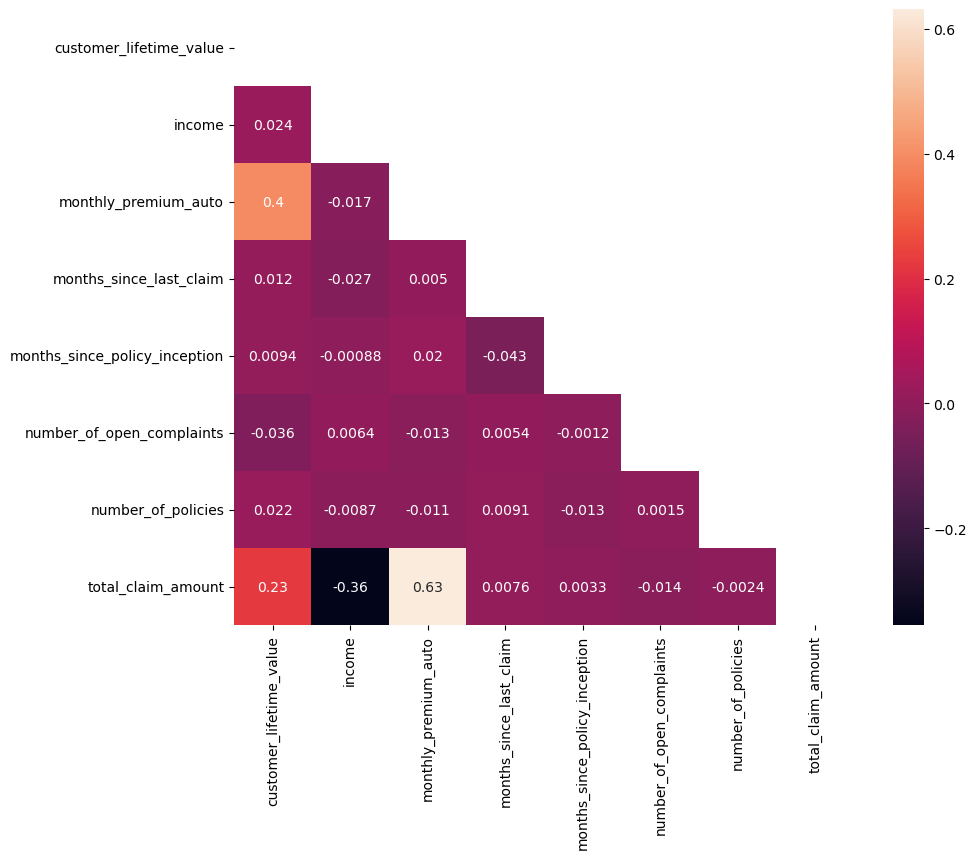

In [17]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

We can't see multicollinearity between columns 

customer_lifetime_value


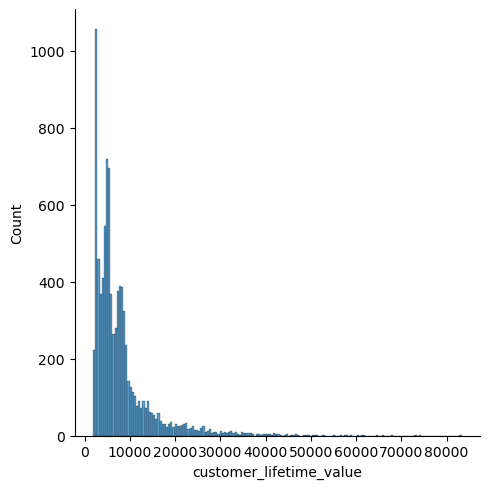

income


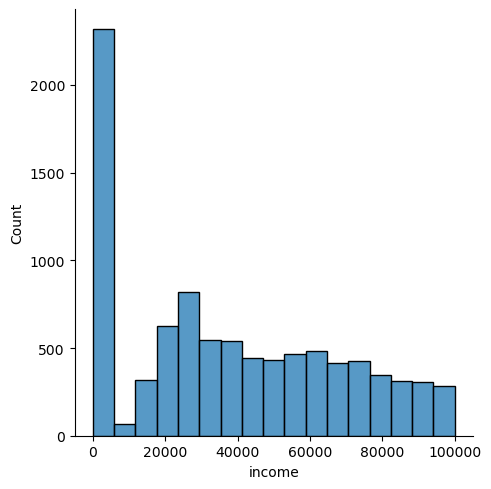

monthly_premium_auto


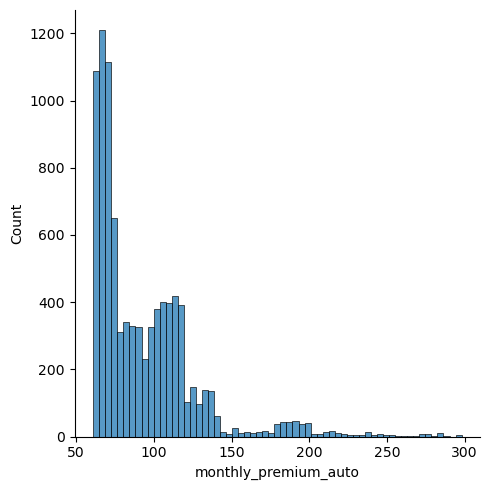

months_since_last_claim


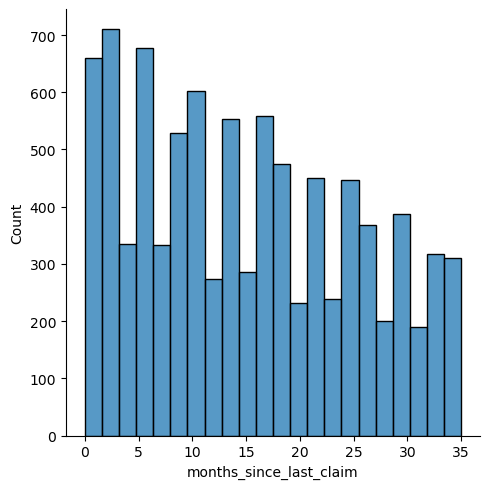

months_since_policy_inception


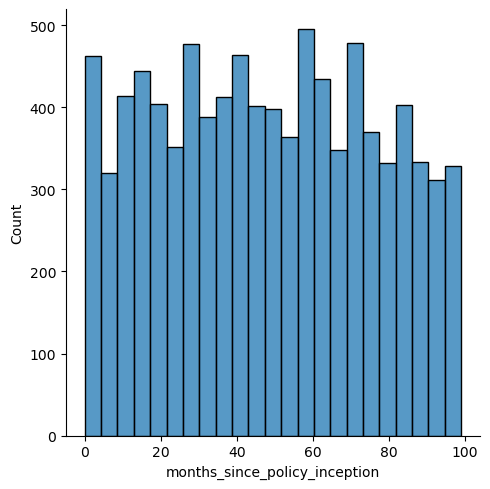

number_of_open_complaints


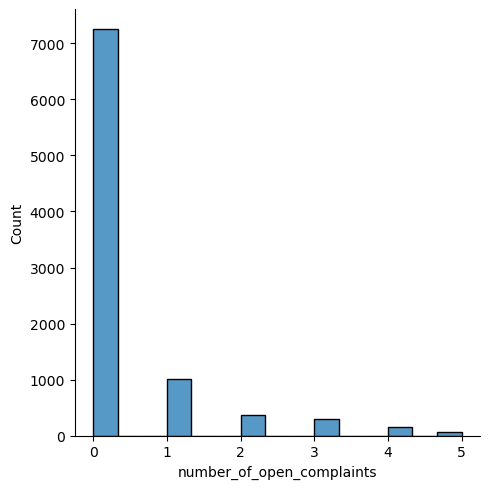

number_of_policies


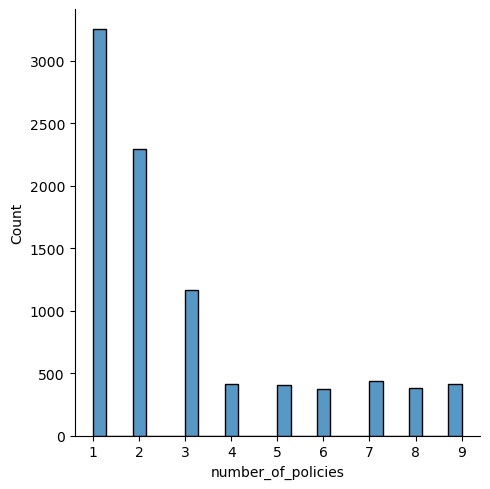

total_claim_amount


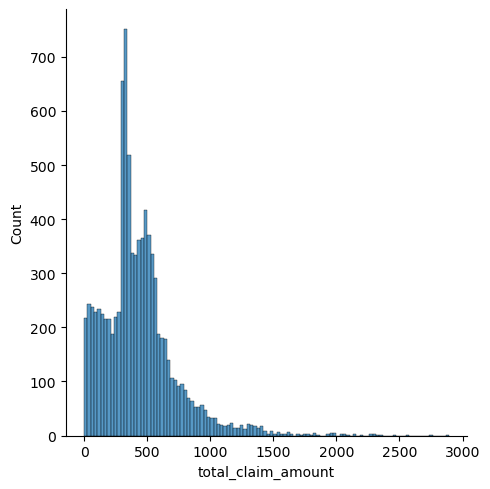

In [18]:
for col in numerical.columns:
    print(col)
    sns.displot(numerical[col])
    plt.show()


We can see that columns with continuous variables(total_claim_amount, monthly_premium_auto, income, customer_lifetiem_value) have mostly normal destribution with scew on the right(because all of this columns represent money). Income have a lot of '0' variables; we can try to get rid of them. Another columns distinct.

<function matplotlib.pyplot.show(close=None, block=None)>

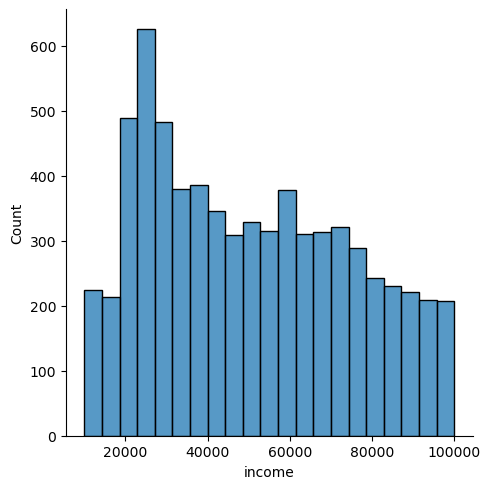

In [19]:
income = numerical[(numerical['income']>0)]
sns.displot(income['income'])
plt.show

**Outliers**


customer_lifetime_value


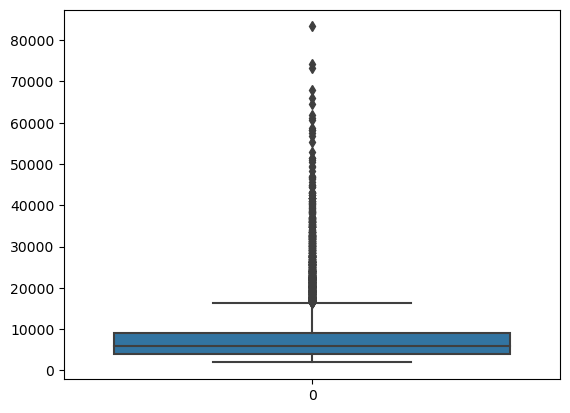

income


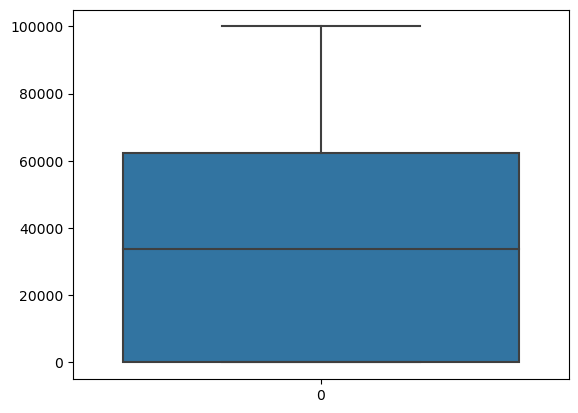

monthly_premium_auto


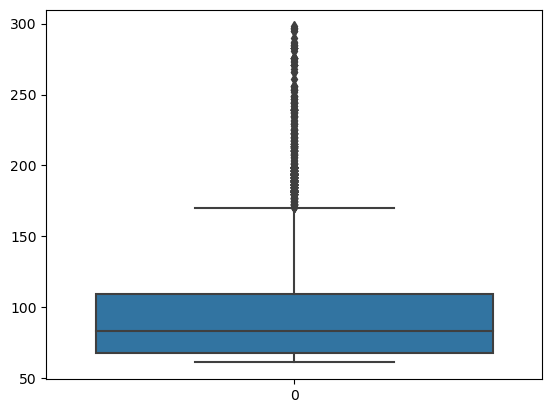

months_since_last_claim


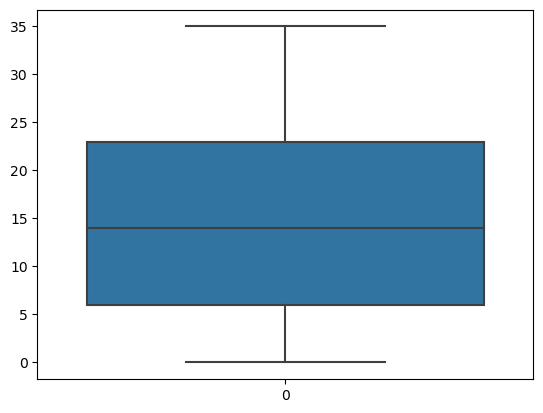

months_since_policy_inception


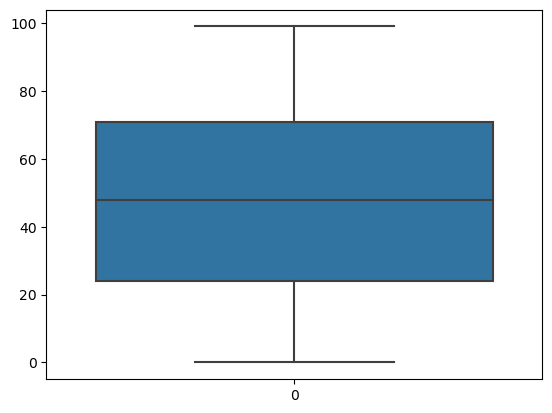

number_of_open_complaints


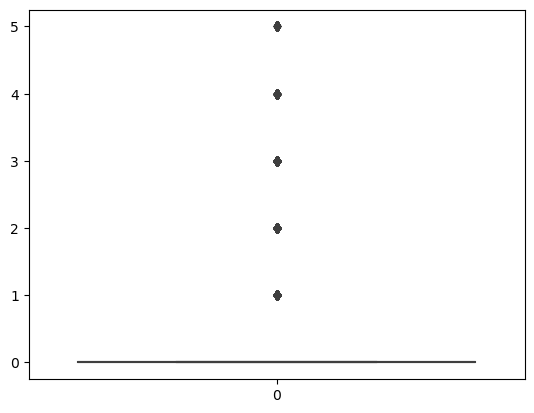

number_of_policies


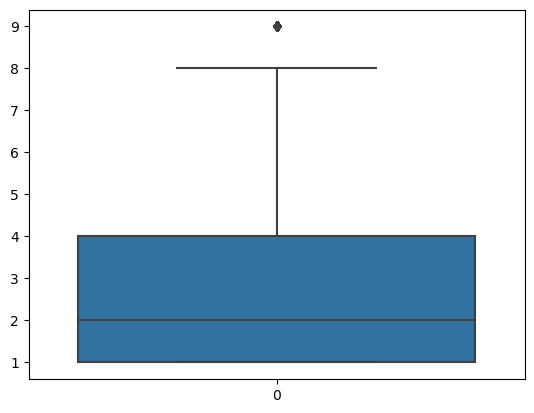

total_claim_amount


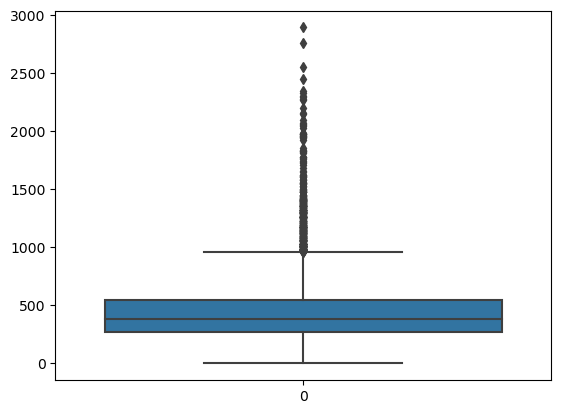

In [20]:
for col in numerical.columns:
    print(col)
    sns.boxplot(numerical[col])
    plt.show()

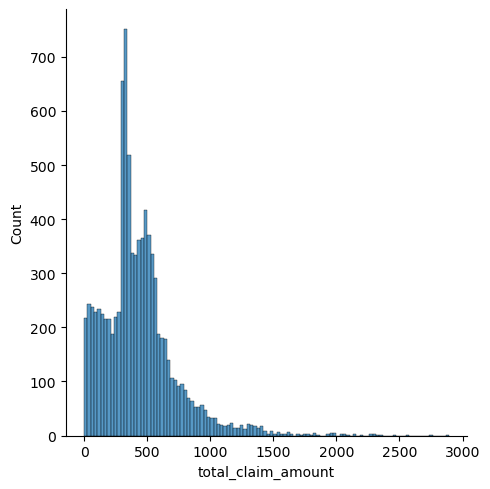

In [21]:
sns.displot(df['total_claim_amount'])

In [22]:

numerical_columns = df.select_dtypes('number').columns
for column in numerical_columns:
    IQR = abs(np.quantile(df[column], 0.75) - np.quantile(df[column], 0.25)) * 1.5
    lower_boundary = np.quantile(df[column], 0.25) - IQR
    upper_boundary = np.quantile(df[column], 0.75) + IQR
    df = df[(df[column] >= lower_boundary) & (df[column] <= upper_boundary)]
df


customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
5     OC83172      Oregon              8256.297800      Yes     Basic   
...       ...         ...                      ...      ...       ...   
9127  TF56202  California              5032.165498       No     Basic   
9128  YM19146  California              4100.398533       No   Premium   
9130  PK87824  California              3096.511217      Yes  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employment_status gender  income  \
0     Bachelor        2011-02-24          Employed      F   56274   
2     Bachelor        2011-02-19          Employed      F   48767   
3     Bachelor        2011-01-20        Unemployed      M       0   
4     Bachelor        2011-02-03          Employed      M   43836   
5     Bachelor        2011-01-25          Employed      F   62902   
...        ...               ...               ...    ...     ...   
9127   College        2011-02-12          Employed      M   66367   
9128   College        2011-01-06          Employed      F   47761   
9130   College        2011-02-12          Employed      F   21604   
9132   College        2011-02-03          Employed      M   21941   
9133   College        2011-02-14        Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
5            Rural        Married                    69   
...            ...            ...                   ...   
9127      Suburban       Divorced                    64   
9128      Suburban         Single                   104   
9130      Suburban       Divorced                    79   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
2                          18                             38   
3                          18                             65   
4                          12                             44   
5                          14                             94   
...                       ...                            ...   
9127                        6                             48   
9128                       16                             58   
9130                       14                             28   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
5                             0                   2   Personal Auto   
...                         ...                 ...             ...   
9127                          0                   3   Personal Auto   
9128                          0                   1   Personal Auto   
9130                          0                   1  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0         

I will filter the data in important for analysis columns after finding Interquartile Range.

customer_lifetime_value


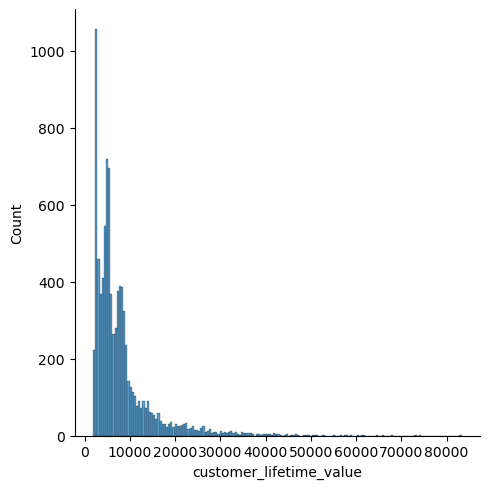

income


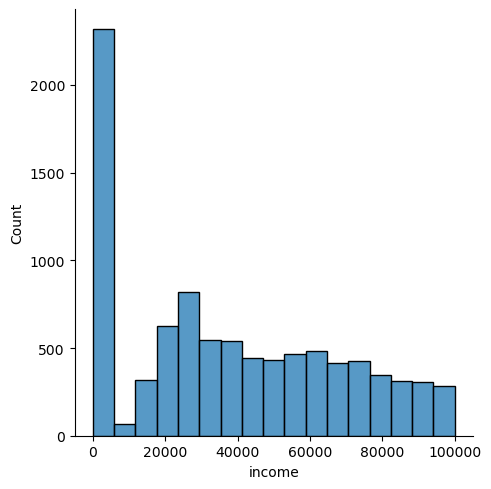

monthly_premium_auto


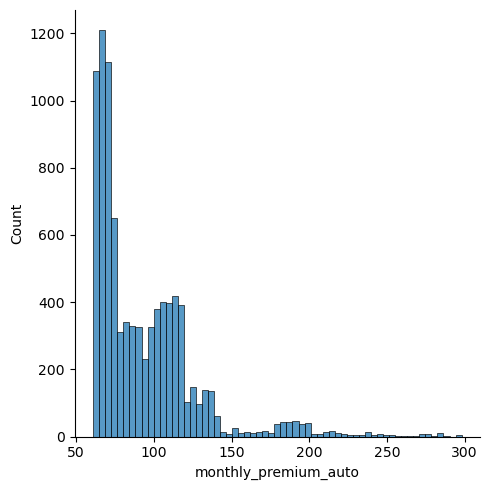

months_since_last_claim


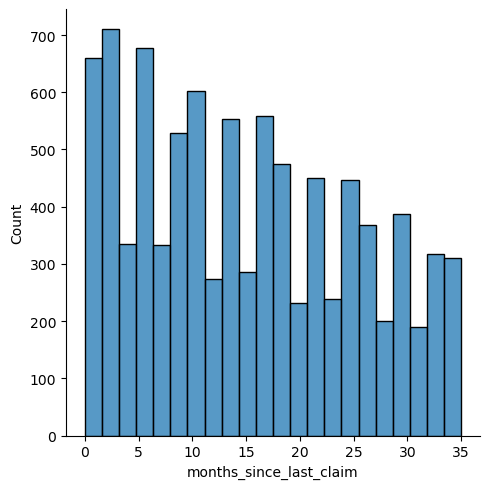

months_since_policy_inception


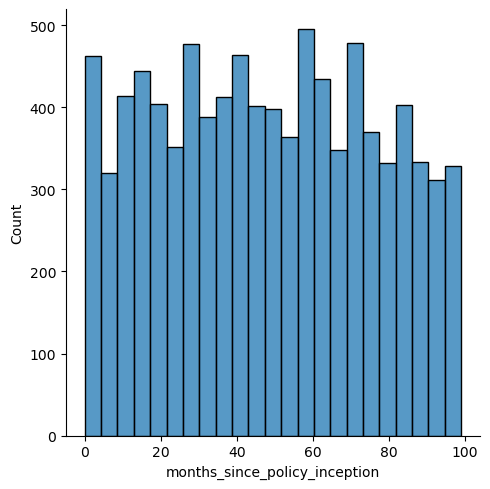

number_of_open_complaints


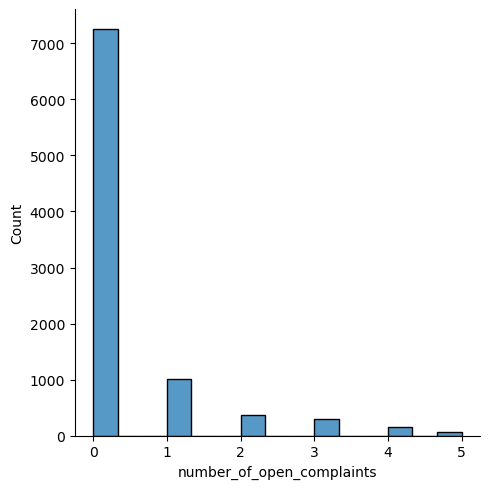

number_of_policies


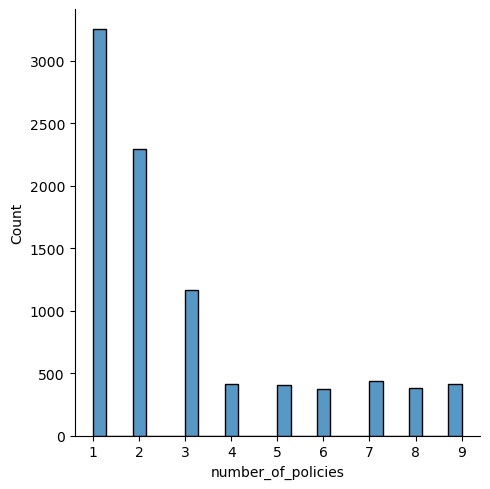

total_claim_amount


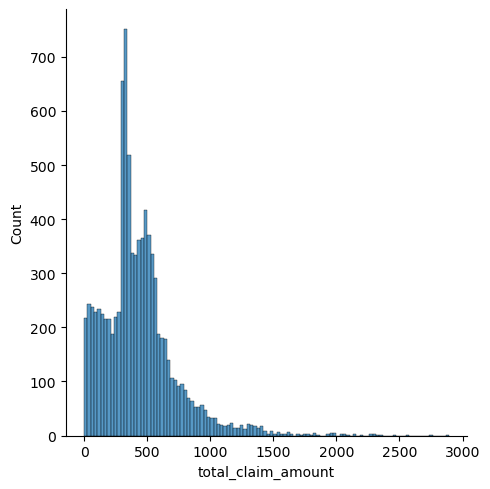

In [23]:
for col in numerical.columns:
    print(col)
    sns.displot(numerical[col])
    plt.show()

In [24]:
categorical = df.select_dtypes('object')
categorical.head()

customer       state response coverage education employment_status gender  \
0  BU79786  Washington       No    Basic  Bachelor          Employed      F   
2  AI49188      Nevada       No  Premium  Bachelor          Employed      F   
3  WW63253  California       No    Basic  Bachelor        Unemployed      M   
4  HB64268  Washington       No    Basic  Bachelor          Employed      M   
5  OC83172      Oregon      Yes    Basic  Bachelor          Employed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   
5         Rural        Married   Personal Auto   Personal L3           Offer2   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize  
5           Web   Two-Door Car      Medsize

In [25]:
categorical.drop(columns=['customer'], inplace=True)
categorical

state response  coverage education employment_status gender  \
0     Washington       No     Basic  Bachelor          Employed      F   
2         Nevada       No   Premium  Bachelor          Employed      F   
3     California       No     Basic  Bachelor        Unemployed      M   
4     Washington       No     Basic  Bachelor          Employed      M   
5         Oregon      Yes     Basic  Bachelor          Employed      F   
...          ...      ...       ...       ...               ...    ...   
9127  California       No     Basic   College          Employed      M   
9128  California       No   Premium   College          Employed      F   
9130  California      Yes  Extended   College          Employed      F   
9132  California       No  Extended   College          Employed      M   
9133  California       No  Extended   College        Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
5            Rural        Married   Personal Auto   Personal L3   
...            ...            ...             ...           ...   
9127      Suburban       Divorced   Personal Auto   Personal L3   
9128      Suburban         Single   Personal Auto   Personal L2   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
5              Offer2           Web   Two-Door Car      Medsize  
...               ...           ...            ...          ...  
9127           Offer2   Call Center   Two-Door Car        Small  
9128           Offer1        Branch  Four-Door Car        Large  
9130           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[5888 rows x 14 columns]

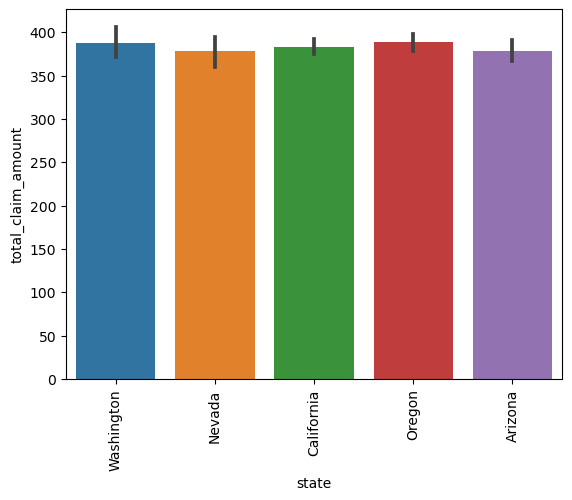

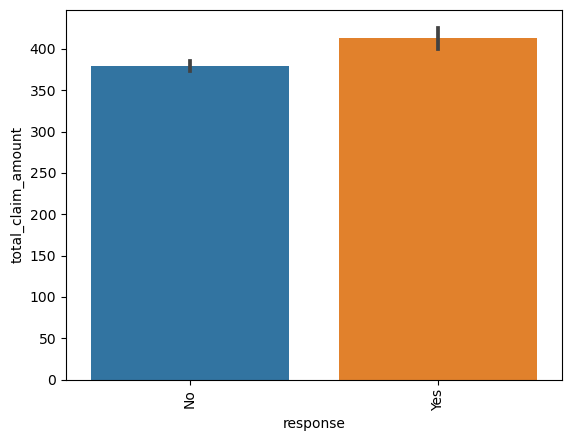

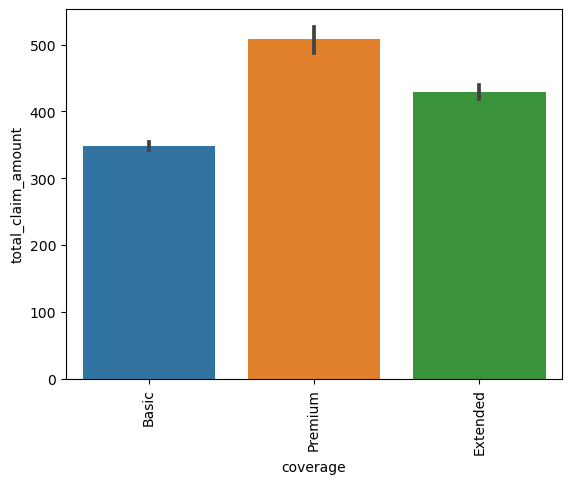

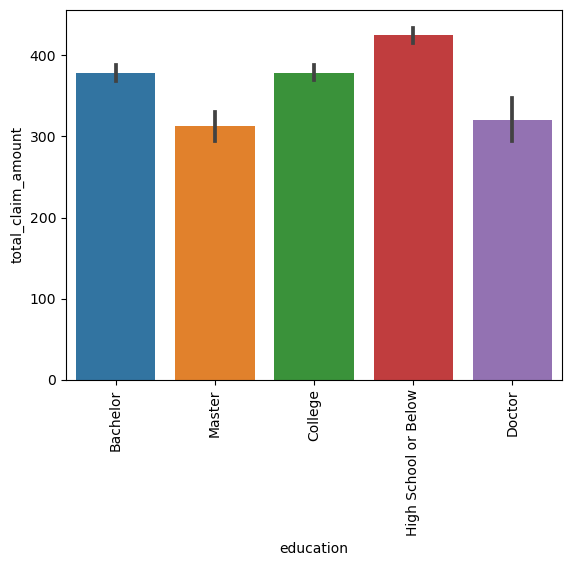

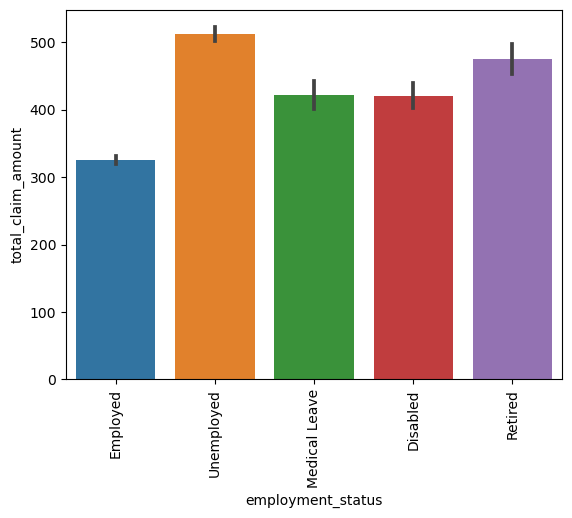

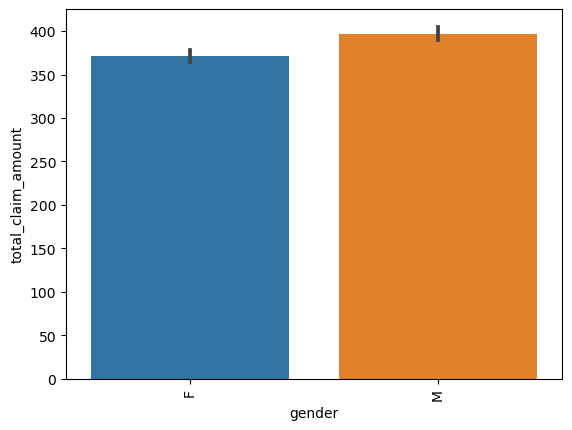

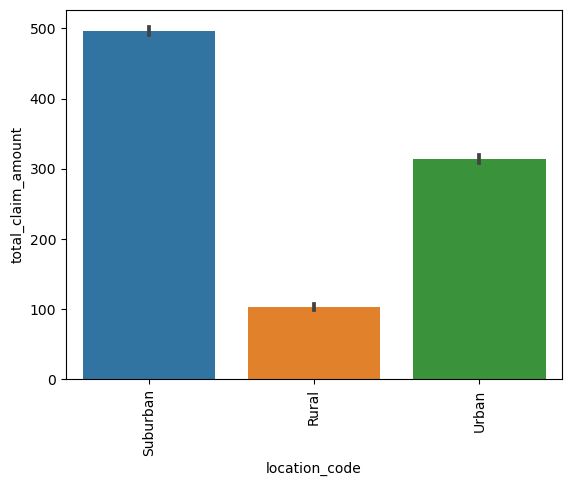

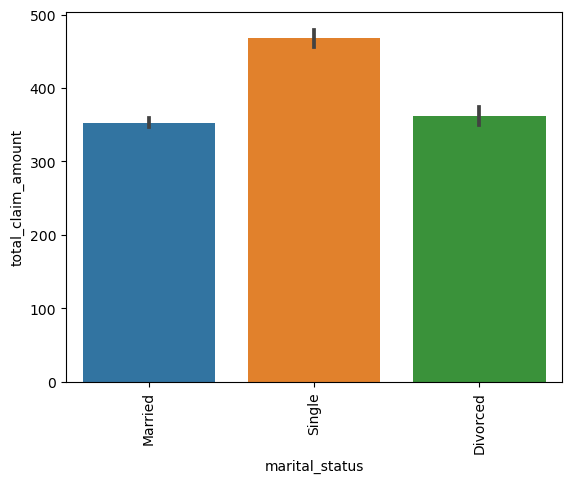

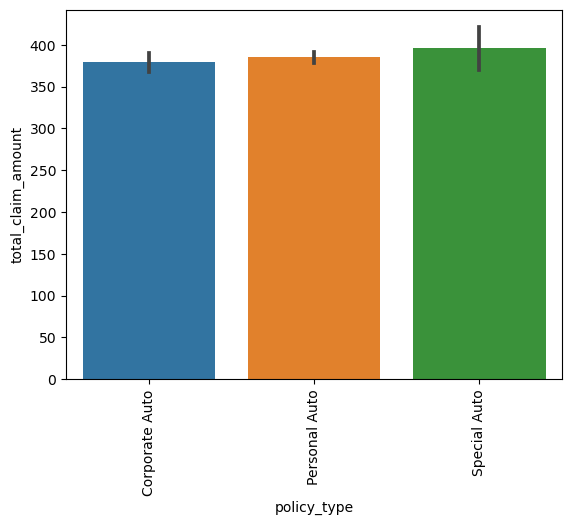

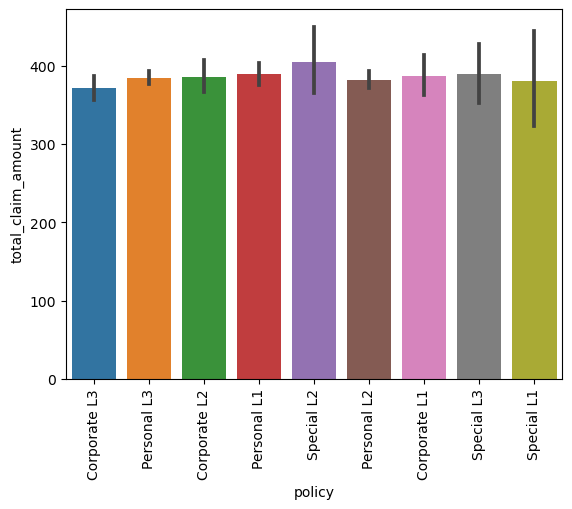

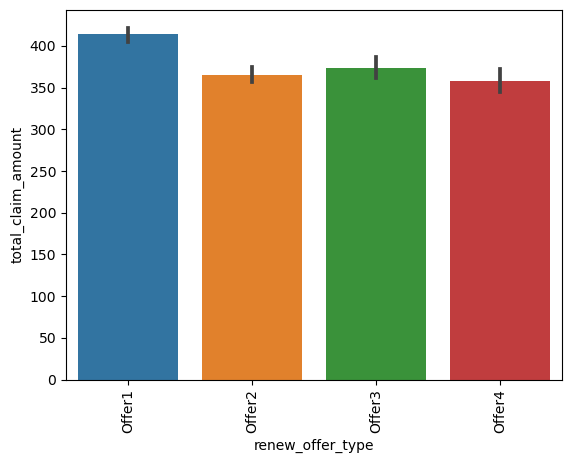

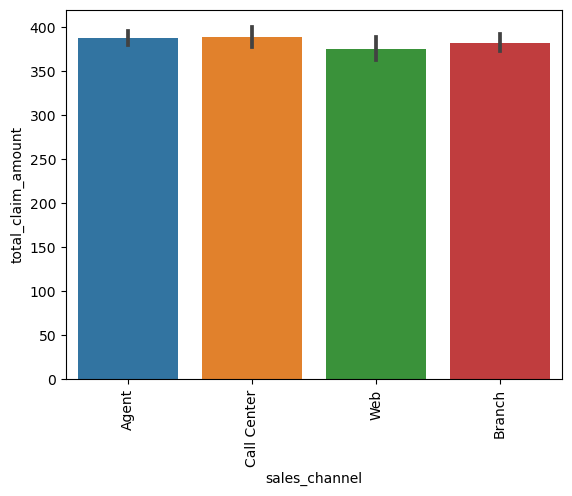

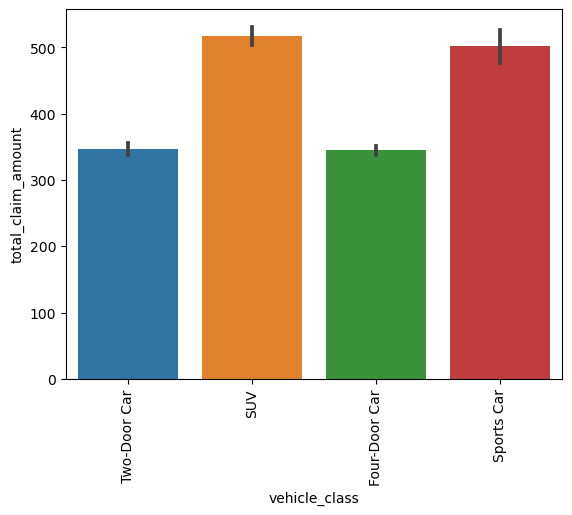

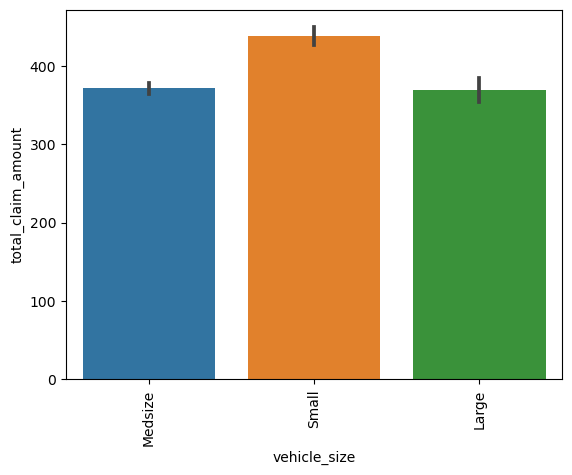

In [26]:
for col in categorical.columns:
    sns.barplot(x=categorical[col], y=df['total_claim_amount'])
    plt.xticks(rotation=90)
    plt.show()

Before plotting the data we deleted customer column because there were unique id values which didn't contain any relevant info for analysis.We can see that total_claim_amount almost the same for all states, so doesn't depend on state, as well doesn't depend on response, gender, policy_type(categories has almost the same claim, but special_auto has bigger variabilities), polica(special L1 has big variability, as well as l2, l3), sales channel. We can see that claim-amount bigger for premium coverage,suburban in location code, for single in marital-status, luxury_car in vehicle_class and small_size. 

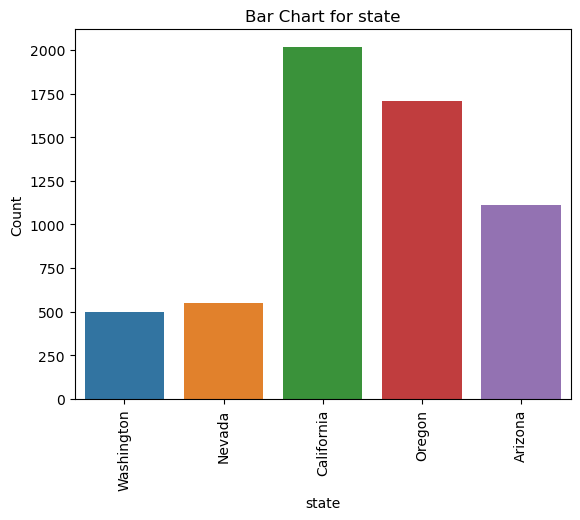

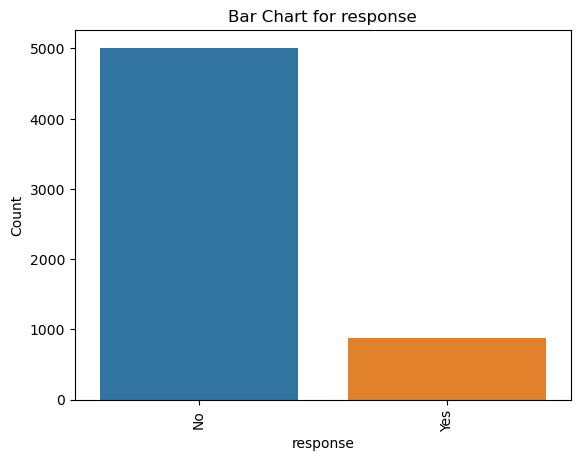

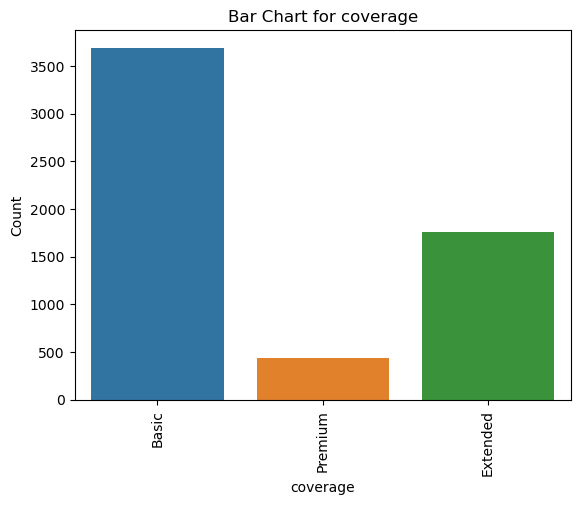

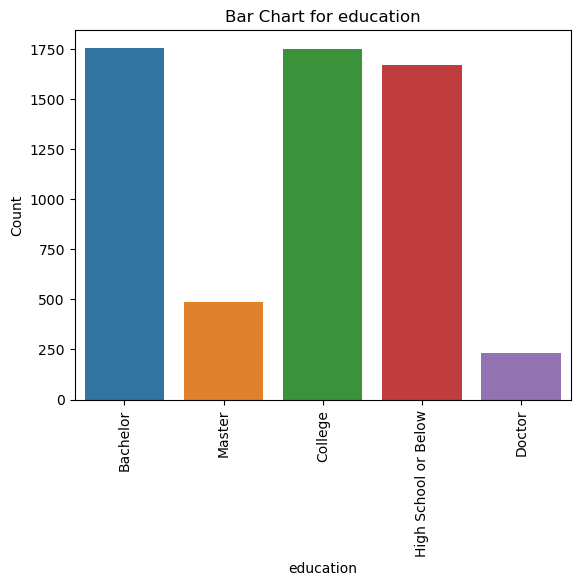

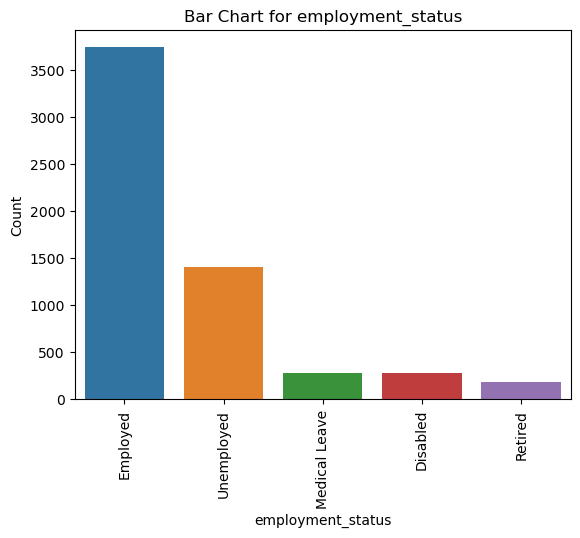

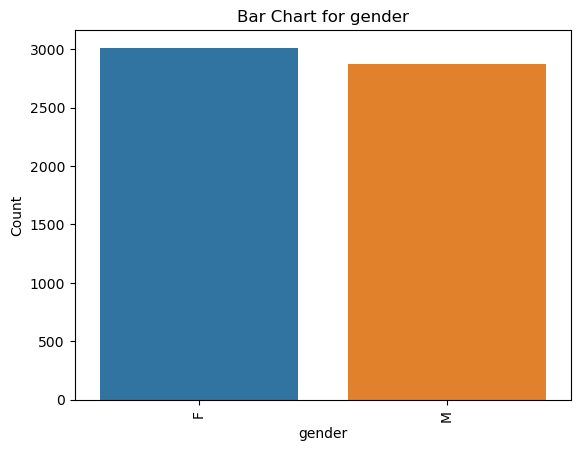

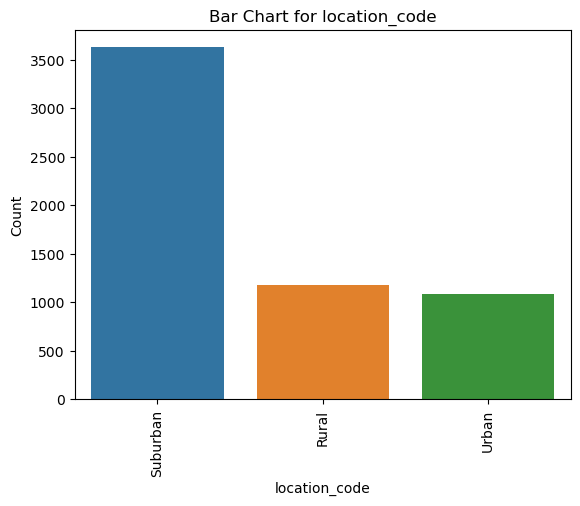

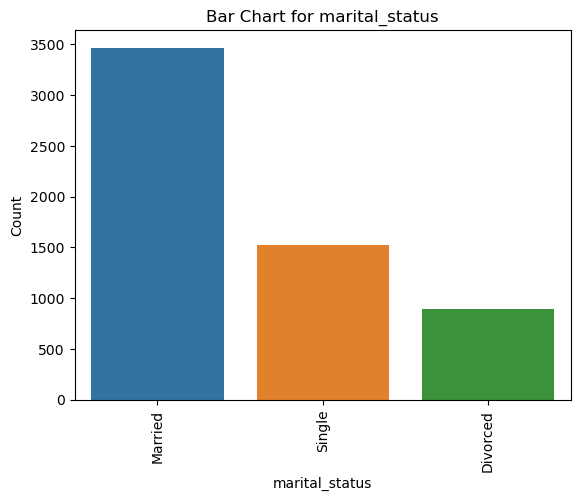

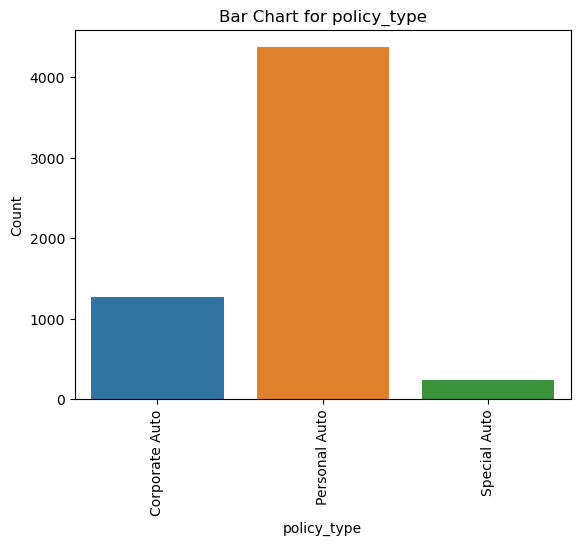

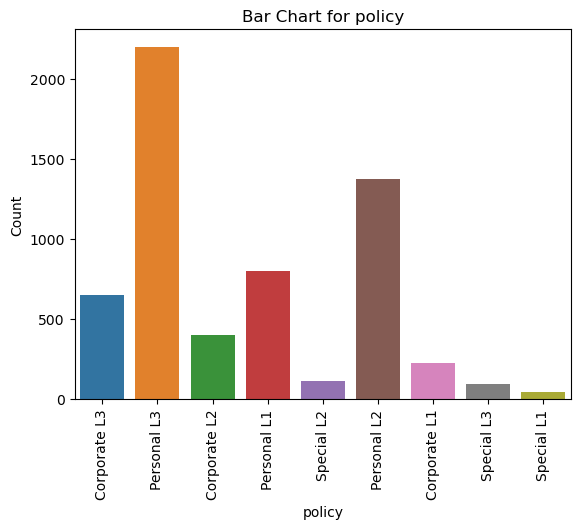

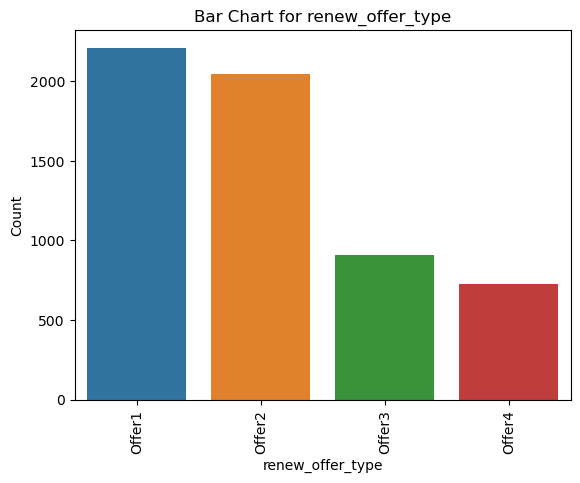

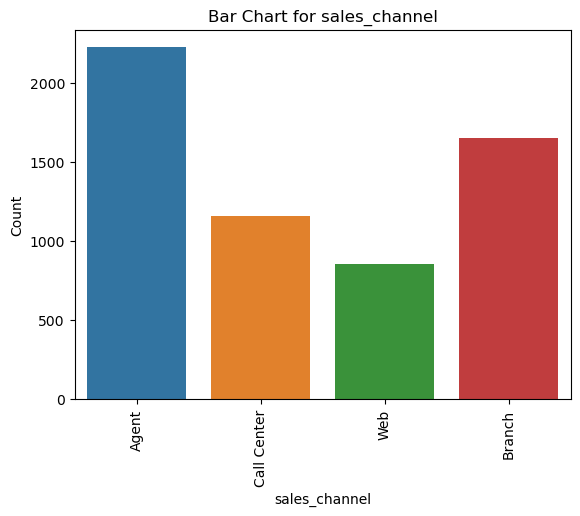

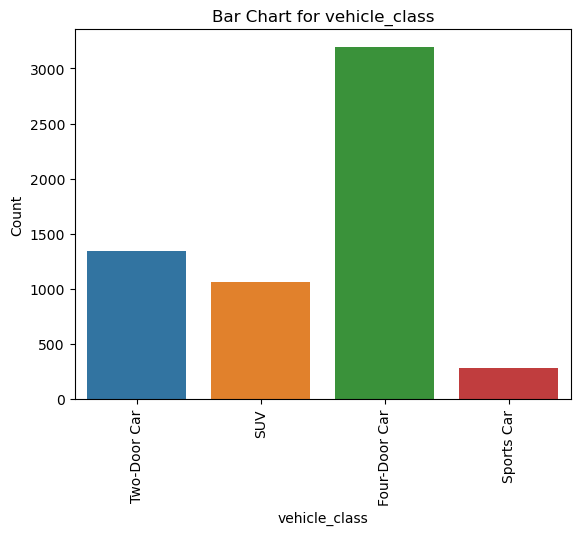

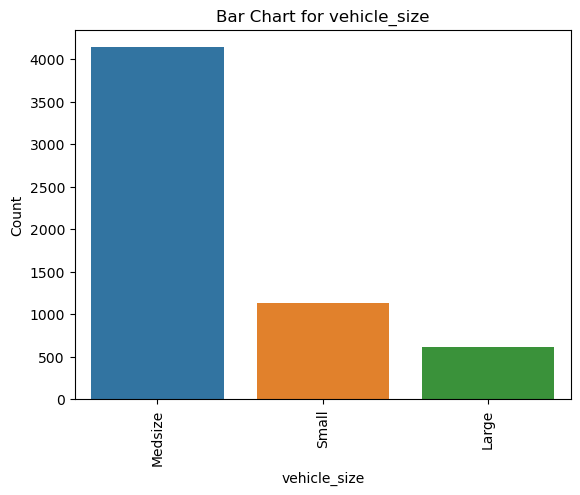

In [27]:
for col in categorical.columns:
    sns.countplot(x=col, data=categorical)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=90)
    plt.show()

Countplot can help us to see actual count of all features from different categories and compare them. It helps us to understand how common each category is within that variable. We can use countplot and barplot together for better understanding relationships between variables and target.

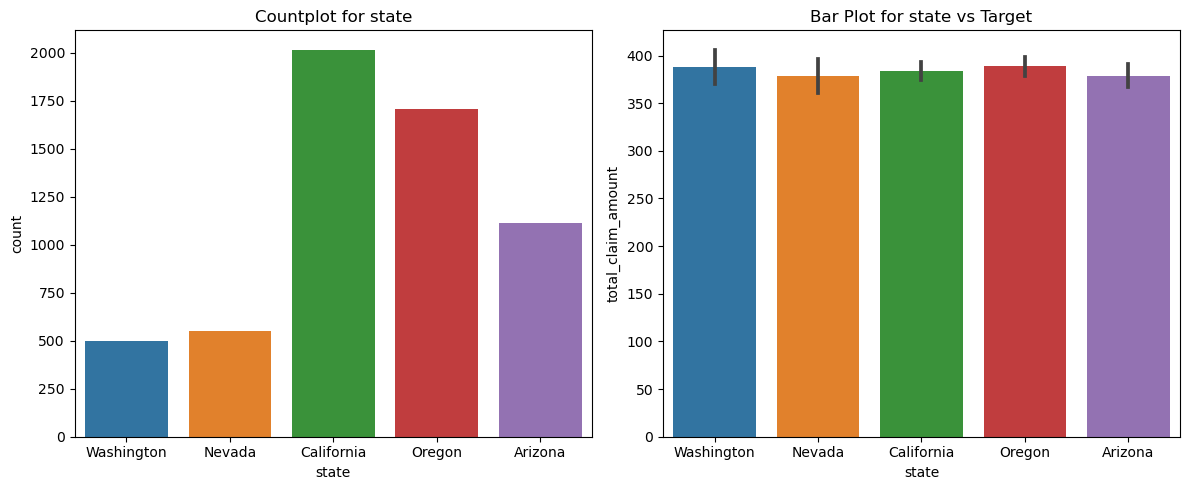

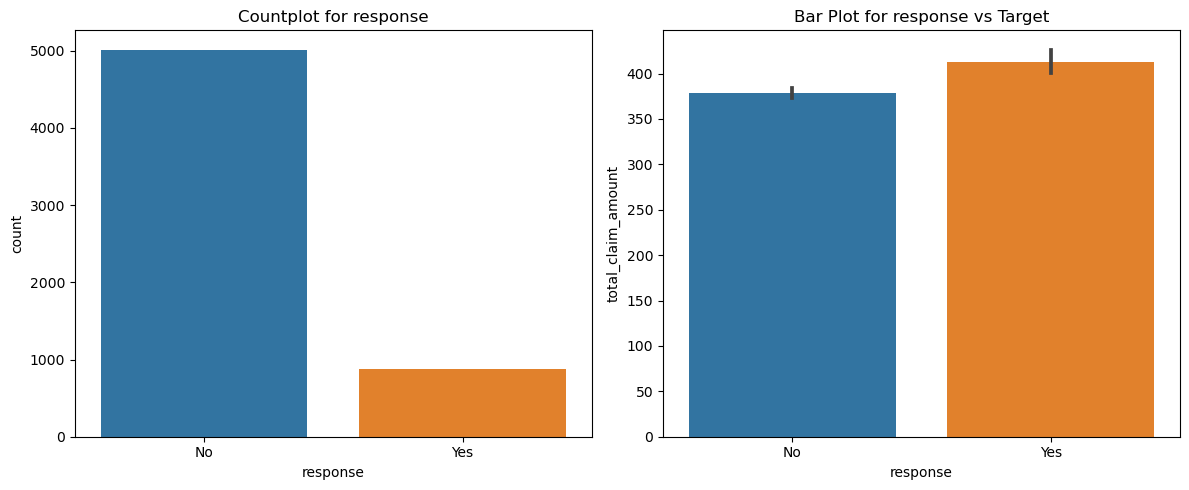

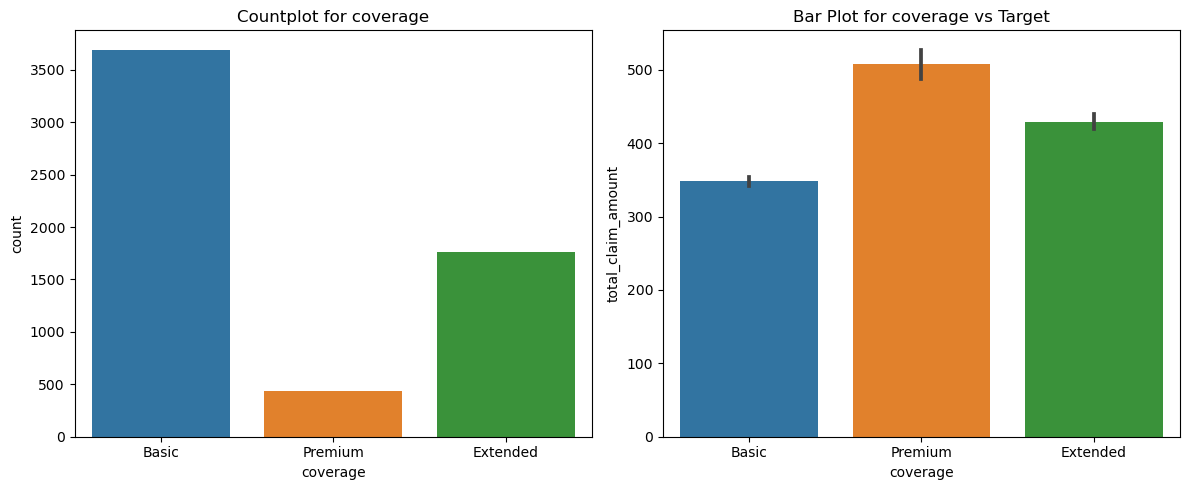

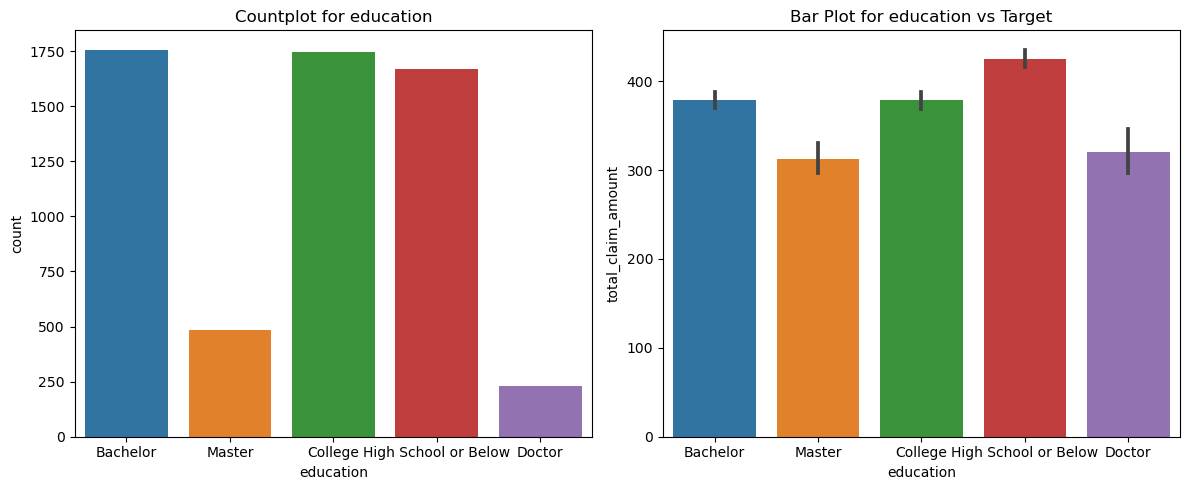

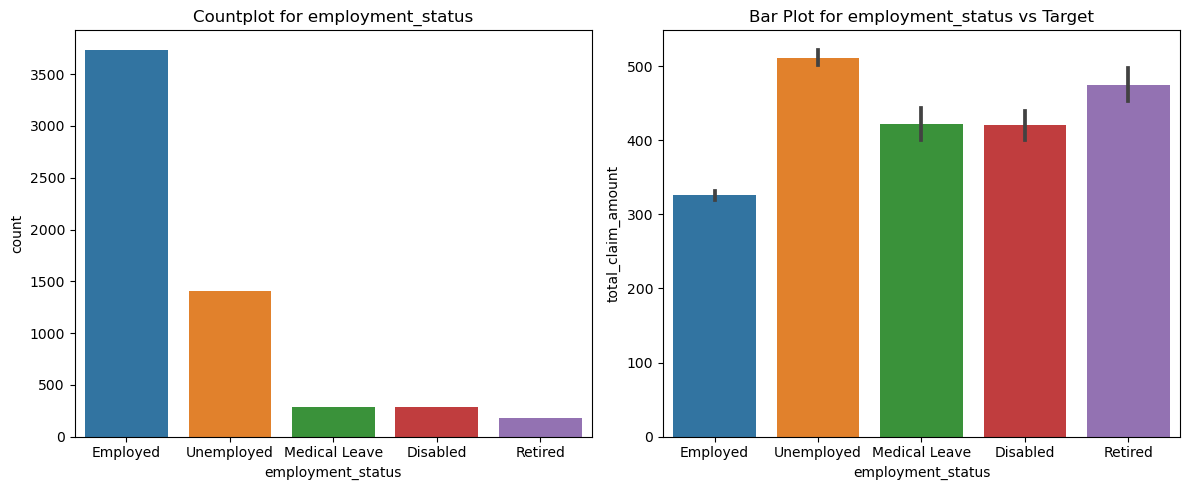

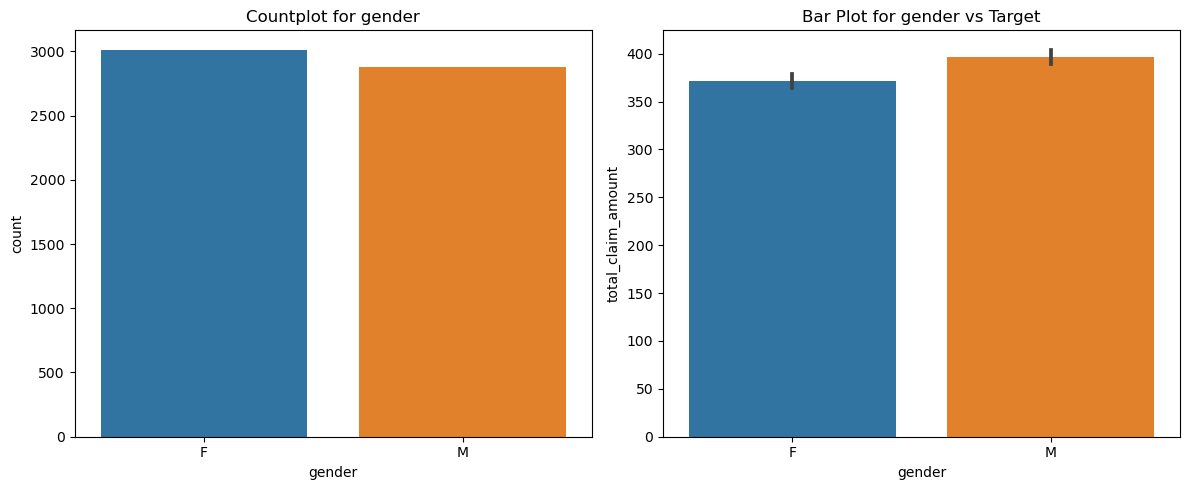

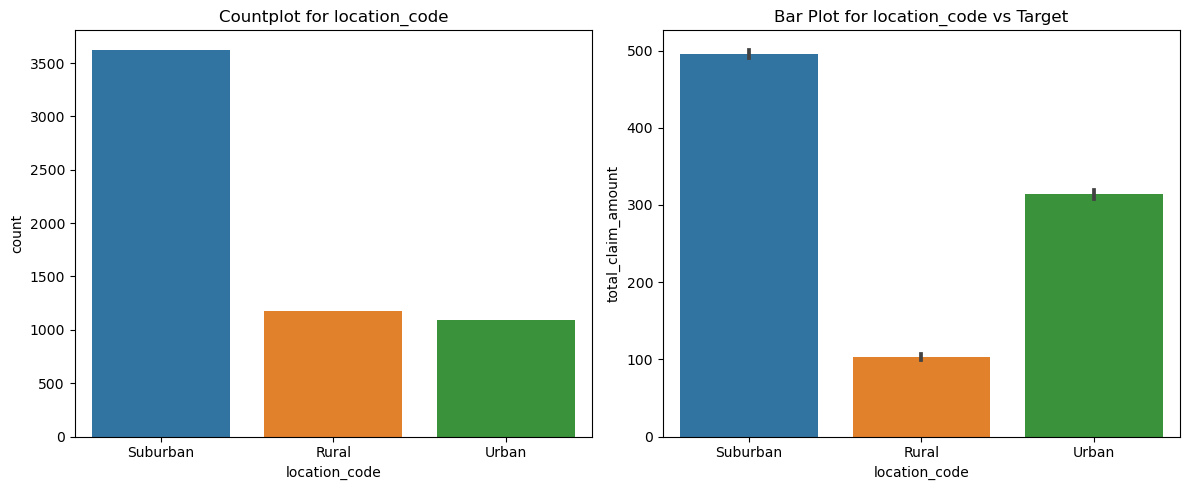

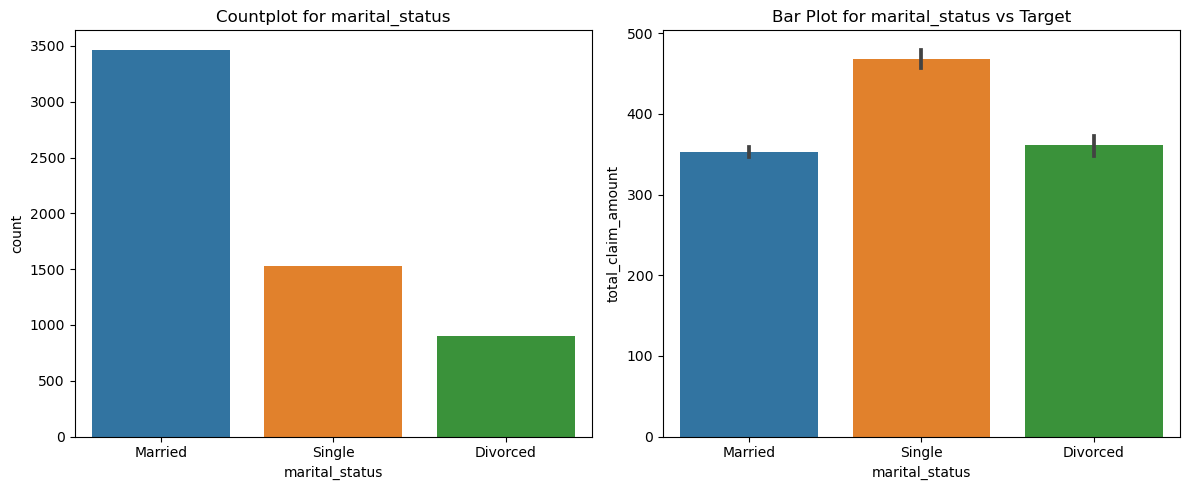

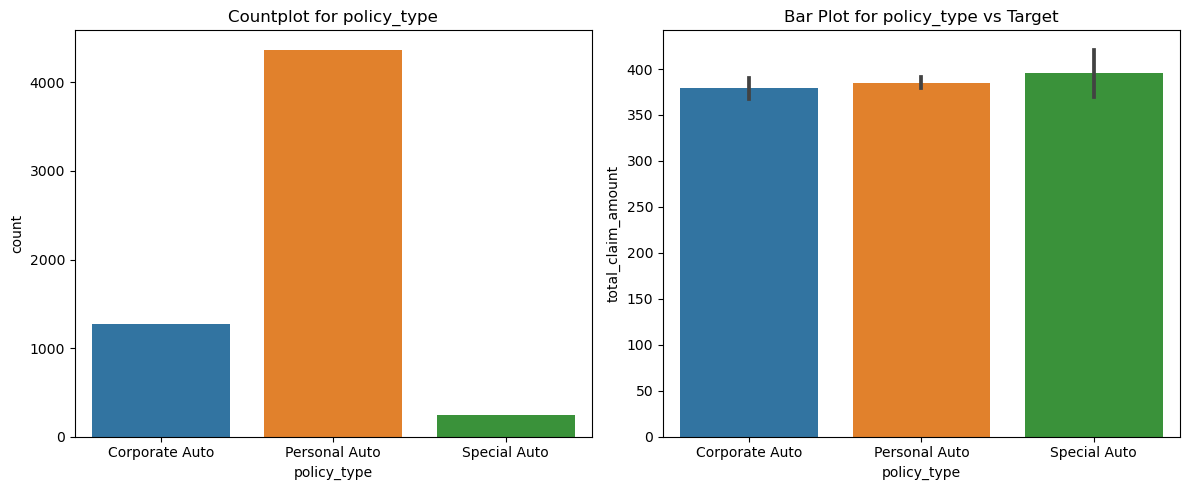

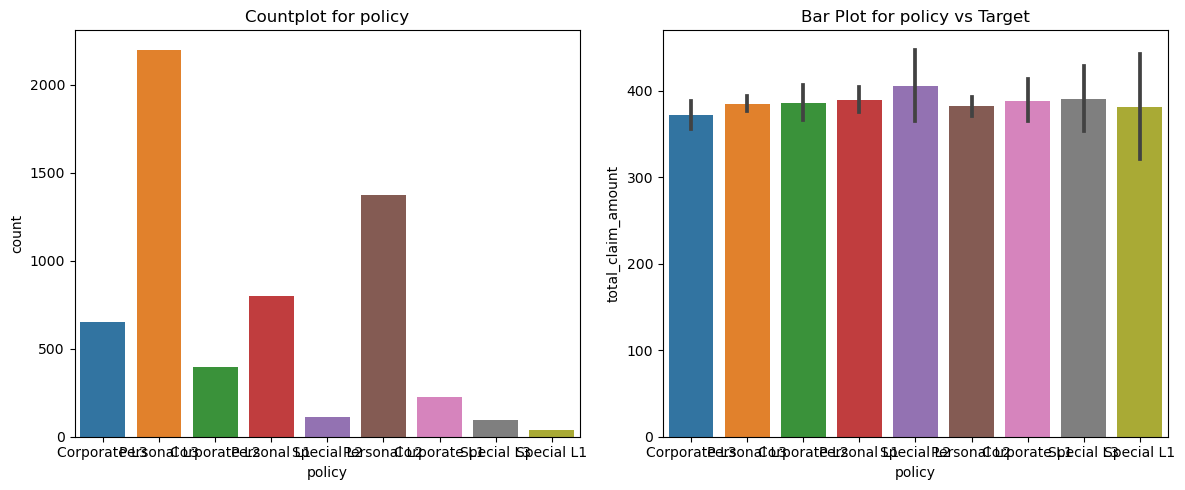

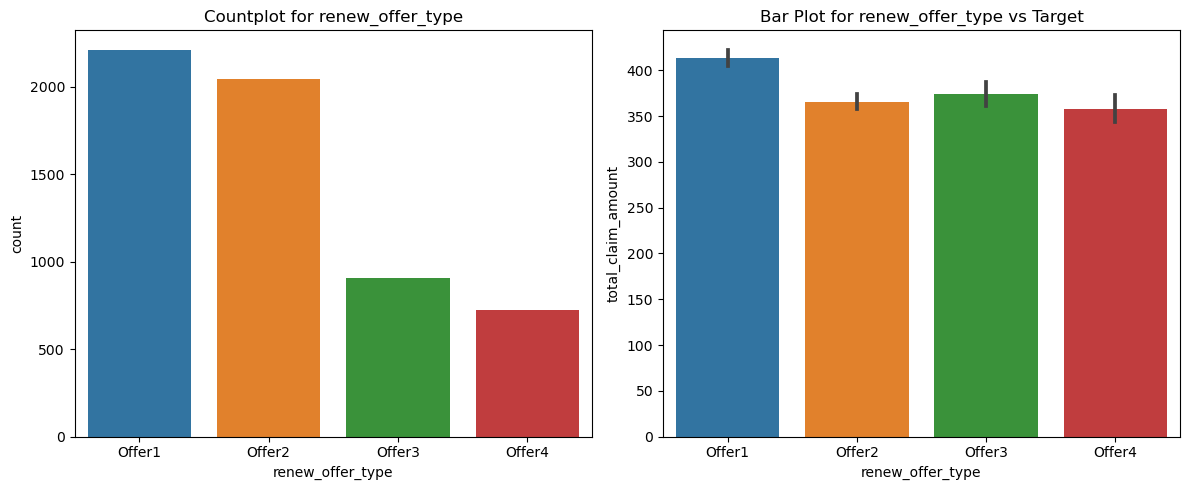

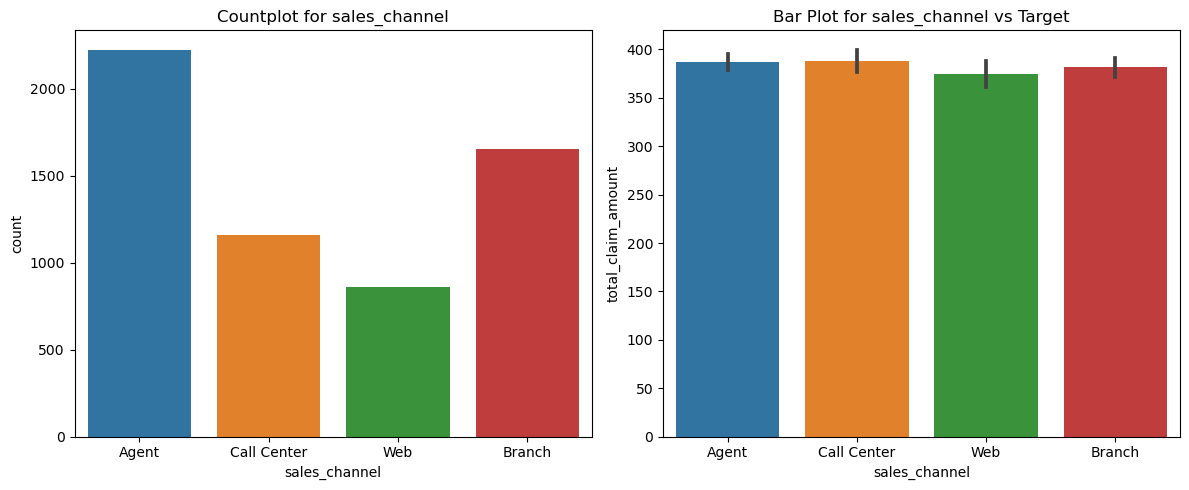

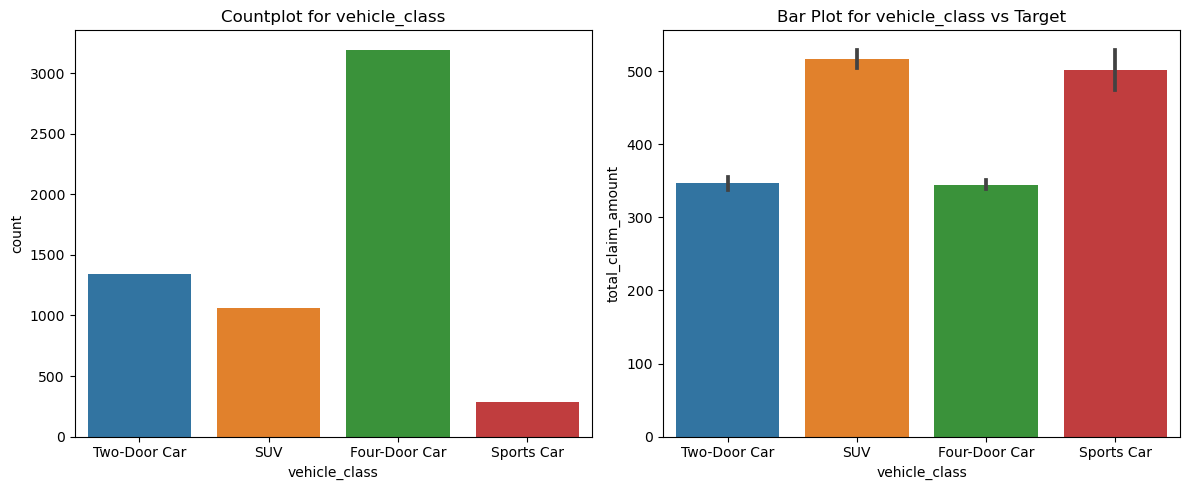

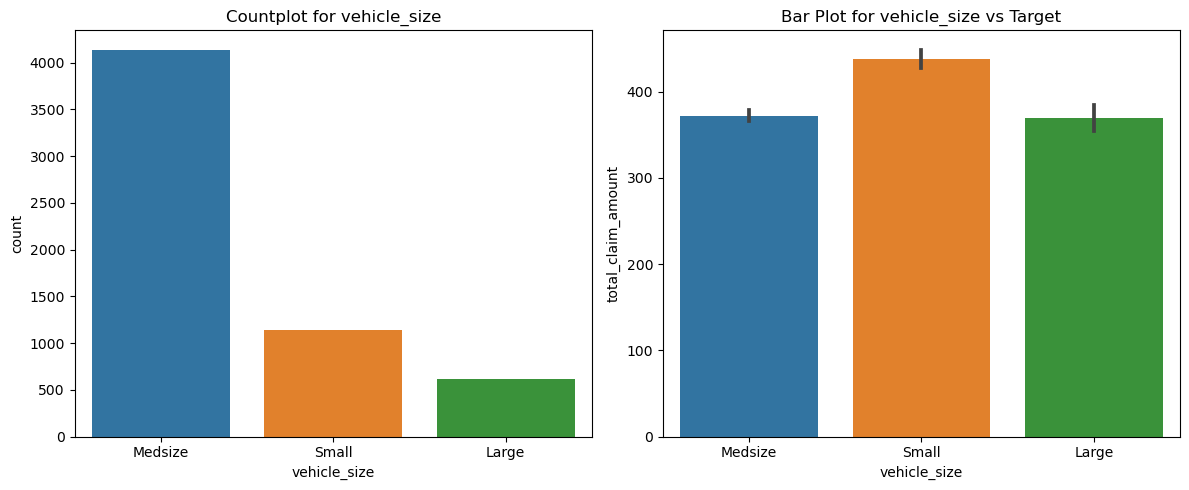

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=categorical)
    plt.title(f'Countplot for {col}')
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.title(f'Bar Plot for {col} vs Target')
    plt.tight_layout()
    plt.show()


In [29]:
for col in categorical.columns:
    print(categorical[col].value_counts())

state
California    2016
Oregon        1709
Arizona       1114
Nevada         553
Washington     496
Name: count, dtype: int64
response
No     5012
Yes     876
Name: count, dtype: int64
coverage
Basic       3691
Extended    1762
Premium      435
Name: count, dtype: int64
education
Bachelor                1756
College                 1747
High School or Below    1669
Master                   485
Doctor                   231
Name: count, dtype: int64
employment_status
Employed         3737
Unemployed       1406
Medical Leave     282
Disabled          282
Retired           181
Name: count, dtype: int64
gender
F    3013
M    2875
Name: count, dtype: int64
location_code
Suburban    3625
Rural       1175
Urban       1088
Name: count, dtype: int64
marital_status
Married     3466
Single      1524
Divorced     898
Name: count, dtype: int64
policy_type
Personal Auto     4370
Corporate Auto    1274
Special Auto       244
Name: count, dtype: int64
policy
Personal L3     2198
Personal L2     1371
P

We don't need to clean our categorical data here, because for every column we have small amount of features and they all standerdized.

In [30]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
drop_col = ['total_claim_amount','customer','effective_to_date' ]
X=df.drop(drop_col, axis=1)
X.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [32]:
X.select_dtypes('object')

state response  coverage education employment_status gender  \
0     Washington       No     Basic  Bachelor          Employed      F   
2         Nevada       No   Premium  Bachelor          Employed      F   
3     California       No     Basic  Bachelor        Unemployed      M   
4     Washington       No     Basic  Bachelor          Employed      M   
5         Oregon      Yes     Basic  Bachelor          Employed      F   
...          ...      ...       ...       ...               ...    ...   
9127  California       No     Basic   College          Employed      M   
9128  California       No   Premium   College          Employed      F   
9130  California      Yes  Extended   College          Employed      F   
9132  California       No  Extended   College          Employed      M   
9133  California       No  Extended   College        Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
5            Rural        Married   Personal Auto   Personal L3   
...            ...            ...             ...           ...   
9127      Suburban       Divorced   Personal Auto   Personal L3   
9128      Suburban         Single   Personal Auto   Personal L2   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
5              Offer2           Web   Two-Door Car      Medsize  
...               ...           ...            ...          ...  
9127           Offer2   Call Center   Two-Door Car        Small  
9128           Offer1        Branch  Four-Door Car        Large  
9130           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[5888 rows x 14 columns]

In [33]:
y = df['total_claim_amount']
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns, drop_first=True)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7855081174983899
MAE: 72.83389534091023
RMSE: 93.02594892149718


**Result before removing outliers:**
R2: 0.7626526452366112
MAE: 94.53603676984038
RMSE: 137.3744343060165

In [35]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

policy_type_Special Auto           2.580395e+14
policy_Special L2                  1.763587e+14
policy_Personal L3                 1.662912e+14
policy_Special L3                  1.586832e+14
policy_type_Personal Auto          1.507863e+14
policy_Personal L2                 1.459926e+14
policy_Personal L1                 1.170475e+14
policy_Special L1                  1.104005e+14
number_of_open_complaints          9.260050e+13
location_code_Suburban             1.732099e+02
monthly_premium_auto               8.734935e+01
location_code_Urban                8.164791e+01
marital_status_Single              2.041454e+01
employment_status_Unemployed       1.940395e+01
income                             8.313653e+00
renew_offer_type_Offer2            6.056012e+00
vehicle_size_Small                 5.819301e+00
vehicle_class_SUV                  4.537115e+00
renew_offer_type_Offer4            3.854823e+00
education_High School or Below     3.584891e+00
number_of_policies                 2.985

In [36]:
data_importance.index[:20]

Index(['policy_type_Special Auto', 'policy_Special L2', 'policy_Personal L3',
       'policy_Special L3', 'policy_type_Personal Auto', 'policy_Personal L2',
       'policy_Personal L1', 'policy_Special L1', 'number_of_open_complaints',
       'location_code_Suburban', 'monthly_premium_auto', 'location_code_Urban',
       'marital_status_Single', 'employment_status_Unemployed', 'income',
       'renew_offer_type_Offer2', 'vehicle_size_Small', 'vehicle_class_SUV',
       'renew_offer_type_Offer4', 'education_High School or Below'],
      dtype='object')

In [37]:

X = X[data_importance.index[:25]]
y = df["total_claim_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7846998457381573
MAE: 73.11316296903142
RMSE: 93.20105938425452


**Before outliers remove:** 
R2: 0.7626105853062113
MAE: 94.41346982330717
RMSE: 137.38660571445382

<Axes: >

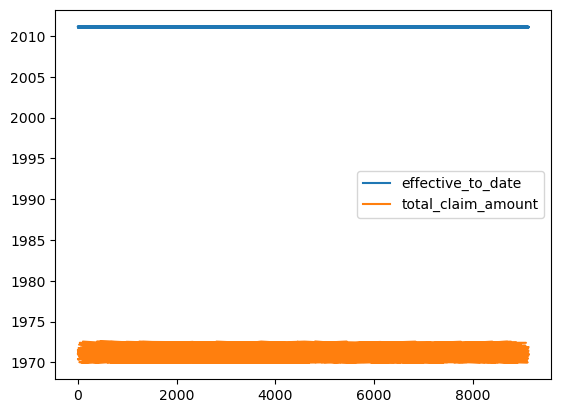

In [38]:
df[['effective_to_date','total_claim_amount']].sort_values('effective_to_date').plot()

In [39]:
df['effective_to_date'].value_counts()

effective_to_date
2011-01-27    128
2011-01-11    122
2011-02-14    122
2011-01-20    118
2011-02-03    117
2011-01-03    115
2011-01-10    114
2011-01-28    114
2011-01-19    113
2011-02-27    111
2011-01-21    111
2011-02-05    111
2011-01-26    110
2011-01-05    109
2011-01-17    109
2011-01-31    107
2011-01-23    107
2011-01-08    106
2011-02-25    106
2011-02-28    106
2011-02-12    106
2011-01-02    105
2011-02-10    104
2011-01-29    104
2011-02-07    104
2011-02-19    102
2011-01-07    101
2011-02-06    101
2011-01-25    100
2011-02-11    100
2011-02-02    100
2011-01-06     99
2011-02-21     99
2011-01-15     97
2011-01-18     97
2011-02-26     97
2011-01-14     95
2011-02-16     94
2011-02-18     93
2011-02-01     93
2011-02-22     92
2011-02-23     92
2011-02-04     92
2011-02-17     90
2011-01-30     90
2011-01-22     90
2011-01-09     88
2011-01-01     88
2011-02-24     87
2011-02-08     87
2011-02-09     86
2011-02-13     85
2011-01-12     85
2011-02-20     85
2011-01-24

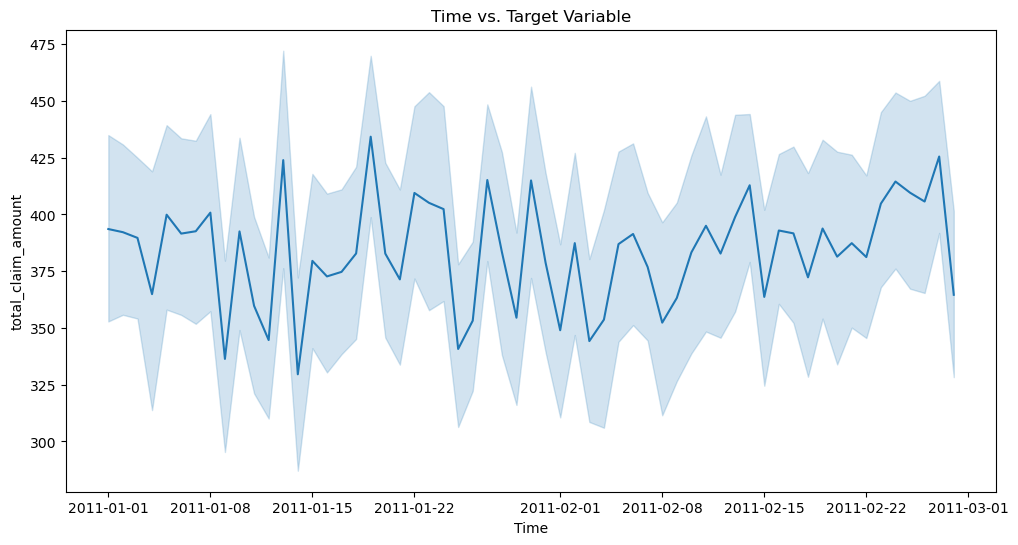

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=df)
plt.title('Time vs. Target Variable')
plt.xlabel('Time')
plt.ylabel('total_claim_amount')
plt.show()

In [41]:
df1=df.copy()
df1

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
5     OC83172      Oregon              8256.297800      Yes     Basic   
...       ...         ...                      ...      ...       ...   
9127  TF56202  California              5032.165498       No     Basic   
9128  YM19146  California              4100.398533       No   Premium   
9130  PK87824  California              3096.511217      Yes  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employment_status gender  income  \
0     Bachelor        2011-02-24          Employed      F   56274   
2     Bachelor        2011-02-19          Employed      F   48767   
3     Bachelor        2011-01-20        Unemployed      M       0   
4     Bachelor        2011-02-03          Employed      M   43836   
5     Bachelor        2011-01-25          Employed      F   62902   
...        ...               ...               ...    ...     ...   
9127   College        2011-02-12          Employed      M   66367   
9128   College        2011-01-06          Employed      F   47761   
9130   College        2011-02-12          Employed      F   21604   
9132   College        2011-02-03          Employed      M   21941   
9133   College        2011-02-14        Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
5            Rural        Married                    69   
...            ...            ...                   ...   
9127      Suburban       Divorced                    64   
9128      Suburban         Single                   104   
9130      Suburban       Divorced                    79   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
2                          18                             38   
3                          18                             65   
4                          12                             44   
5                          14                             94   
...                       ...                            ...   
9127                        6                             48   
9128                       16                             58   
9130                       14                             28   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
5                             0                   2   Personal Auto   
...                         ...                 ...             ...   
9127                          0                   3   Personal Auto   
9128                          0                   1   Personal Auto   
9130                          0                   1  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0         

In [42]:
df1.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [43]:
y1 = df1['total_claim_amount']
X1 = df1.drop(['customer', 'total_claim_amount'], axis=1)
X1.head()


state  customer_lifetime_value response coverage education  \
0  Washington              2763.519279       No    Basic  Bachelor   
2      Nevada             12887.431650       No  Premium  Bachelor   
3  California              7645.861827       No    Basic  Bachelor   
4  Washington              2813.692575       No    Basic  Bachelor   
5      Oregon              8256.297800      Yes    Basic  Bachelor   

  effective_to_date employment_status gender  income location_code  \
0        2011-02-24          Employed      F   56274      Suburban   
2        2011-02-19          Employed      F   48767      Suburban   
3        2011-01-20        Unemployed      M       0      Suburban   
4        2011-02-03          Employed      M   43836         Rural   
5        2011-01-25          Employed      F   62902         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   
5                             94                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   
5                   2   Personal Auto   Personal L3           Offer2   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize  
5           Web   Two-Door Car      Medsize

In [44]:
X1.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [45]:
X1 = pd.get_dummies(X1, columns=['education', 'gender','state','marital_status', 'policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)
X1

customer_lifetime_value response  coverage effective_to_date  \
0                 2763.519279       No     Basic        2011-02-24   
2                12887.431650       No   Premium        2011-02-19   
3                 7645.861827       No     Basic        2011-01-20   
4                 2813.692575       No     Basic        2011-02-03   
5                 8256.297800      Yes     Basic        2011-01-25   
...                       ...      ...       ...               ...   
9127              5032.165498       No     Basic        2011-02-12   
9128              4100.398533       No   Premium        2011-01-06   
9130              3096.511217      Yes  Extended        2011-02-12   
9132              7524.442436       No  Extended        2011-02-03   
9133              2611.836866       No  Extended        2011-02-14   

     employment_status  income location_code  monthly_premium_auto  \
0             Employed   56274      Suburban                    69   
2             Employed   48767      Suburban                   108   
3           Unemployed       0      Suburban                   106   
4             Employed   43836         Rural                    73   
5             Employed   62902         Rural                    69   
...                ...     ...           ...                   ...   
9127          Employed   66367      Suburban                    64   
9128          Employed   47761      Suburban                   104   
9130          Employed   21604      Suburban                    79   
9132          Employed   21941      Suburban                    96   
9133        Unemployed       0      Suburban                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
2                          18                             38   
3                          18                             65   
4                          12                             44   
5                          14                             94   
...                       ...                            ...   
9127                        6                             48   
9128                       16                             58   
9130                       14                             28   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies vehicle_size  \
0                             0                   1      Medsize   
2                             0                   2      Medsize   
3                             0                   7      Medsize   
4                             0                   1      Medsize   
5                             0                   2      Medsize   
...                         ...                 ...          ...   
9127                          0                   3        Small   
9128                          0                   1        Large   
9130                          0                   1      Medsize   
9132                          0                   3        Large   
9133                          0                   1      Medsize   

      education_College  education_Doctor  education_High School or Below  \
0                 False             False                           False   
2                 False             False                           False   
3                 False             False                           False   
4                 False             False                           False   
5                 False             False                           False   
...                 ...               ...                             ...   
9127               True             False                           False   
9128               True             False                           False   
9130               True             False    

In [46]:
X1["coverage"] = X1["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X1["coverage"]

0       0
2       2
3       0
4       0
5       0
       ..
9127    0
9128    2
9130    1
9132    1
9133    1
Name: coverage, Length: 5888, dtype: int64

In [47]:
X1["employment_status"].value_counts()


employment_status
Employed         3737
Unemployed       1406
Medical Leave     282
Disabled          282
Retired           181
Name: count, dtype: int64

In [48]:
X1["employment_status"] = X1["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2,"Disabled": 3, "Retired":4})
X1["employment_status"]

0       0
2       0
3       1
4       0
5       0
       ..
9127    0
9128    0
9130    0
9132    0
9133    1
Name: employment_status, Length: 5888, dtype: int64

In [49]:
X1["location_code"].value_counts()

location_code
Suburban    3625
Rural       1175
Urban       1088
Name: count, dtype: int64

In [50]:
X1["location_code"] = X1["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X1["location_code"]

0       0
2       0
3       0
4       1
5       1
       ..
9127    0
9128    0
9130    0
9132    0
9133    0
Name: location_code, Length: 5888, dtype: int64

In [51]:
X1["vehicle_size"].value_counts()

vehicle_size
Medsize    4140
Small      1136
Large       612
Name: count, dtype: int64

In [52]:
X1["vehicle_size"] = X1["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})
X1["vehicle_size"]

0       0
2       0
3       0
4       0
5       0
       ..
9127    1
9128    2
9130    0
9132    2
9133    0
Name: vehicle_size, Length: 5888, dtype: int64

In [53]:
X1["response"] = X1["response"].map({"No" : 0, "Yes" : 1})
X1["response"]

0       0
2       0
3       0
4       0
5       1
       ..
9127    0
9128    0
9130    1
9132    0
9133    0
Name: response, Length: 5888, dtype: int64

In [54]:
X1.dtypes

customer_lifetime_value                  float64
response                                   int64
coverage                                   int64
effective_to_date                 datetime64[ns]
employment_status                          int64
income                                     int64
location_code                              int64
monthly_premium_auto                       int64
months_since_last_claim                    int64
months_since_policy_inception              int64
number_of_open_complaints                  int64
number_of_policies                         int64
vehicle_size                               int64
education_College                           bool
education_Doctor                            bool
education_High School or Below              bool
education_Master                            bool
gender_M                                    bool
state_California                            bool
state_Nevada                                bool
state_Oregon        

In [55]:
X1.dtypes

customer_lifetime_value                  float64
response                                   int64
coverage                                   int64
effective_to_date                 datetime64[ns]
employment_status                          int64
income                                     int64
location_code                              int64
monthly_premium_auto                       int64
months_since_last_claim                    int64
months_since_policy_inception              int64
number_of_open_complaints                  int64
number_of_policies                         int64
vehicle_size                               int64
education_College                           bool
education_Doctor                            bool
education_High School or Below              bool
education_Master                            bool
gender_M                                    bool
state_California                            bool
state_Nevada                                bool
state_Oregon        

In [56]:
X1['effective_to_date'].value_counts()

effective_to_date
2011-01-27    128
2011-01-11    122
2011-02-14    122
2011-01-20    118
2011-02-03    117
2011-01-03    115
2011-01-10    114
2011-01-28    114
2011-01-19    113
2011-02-27    111
2011-01-21    111
2011-02-05    111
2011-01-26    110
2011-01-05    109
2011-01-17    109
2011-01-31    107
2011-01-23    107
2011-01-08    106
2011-02-25    106
2011-02-28    106
2011-02-12    106
2011-01-02    105
2011-02-10    104
2011-01-29    104
2011-02-07    104
2011-02-19    102
2011-01-07    101
2011-02-06    101
2011-01-25    100
2011-02-11    100
2011-02-02    100
2011-01-06     99
2011-02-21     99
2011-01-15     97
2011-01-18     97
2011-02-26     97
2011-01-14     95
2011-02-16     94
2011-02-18     93
2011-02-01     93
2011-02-22     92
2011-02-23     92
2011-02-04     92
2011-02-17     90
2011-01-30     90
2011-01-22     90
2011-01-09     88
2011-01-01     88
2011-02-24     87
2011-02-08     87
2011-02-09     86
2011-02-13     85
2011-01-12     85
2011-02-20     85
2011-01-24

In [57]:
X1['day'] = X1['effective_to_date'].dt.day
X1['month'] = X1['effective_to_date'].dt.month
X1

customer_lifetime_value  response  coverage effective_to_date  \
0                 2763.519279         0         0        2011-02-24   
2                12887.431650         0         2        2011-02-19   
3                 7645.861827         0         0        2011-01-20   
4                 2813.692575         0         0        2011-02-03   
5                 8256.297800         1         0        2011-01-25   
...                       ...       ...       ...               ...   
9127              5032.165498         0         0        2011-02-12   
9128              4100.398533         0         2        2011-01-06   
9130              3096.511217         1         1        2011-02-12   
9132              7524.442436         0         1        2011-02-03   
9133              2611.836866         0         1        2011-02-14   

      employment_status  income  location_code  monthly_premium_auto  \
0                     0   56274              0                    69   
2                     0   48767              0                   108   
3                     1       0              0                   106   
4                     0   43836              1                    73   
5                     0   62902              1                    69   
...                 ...     ...            ...                   ...   
9127                  0   66367              0                    64   
9128                  0   47761              0                   104   
9130                  0   21604              0                    79   
9132                  0   21941              0                    96   
9133                  1       0              0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
2                          18                             38   
3                          18                             65   
4                          12                             44   
5                          14                             94   
...                       ...                            ...   
9127                        6                             48   
9128                       16                             58   
9130                       14                             28   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  vehicle_size  \
0                             0                   1             0   
2                             0                   2             0   
3                             0                   7             0   
4                             0                   1             0   
5                             0                   2             0   
...                         ...                 ...           ...   
9127                          0                   3             1   
9128                          0                   1             2   
9130                          0                   1             0   
9132                          0                   3             2   
9133                          0                   1             0   

      education_College  education_Doctor  education_High School or Below  \
0                 False             False                           False   
2                 False             False                           False   
3                 False             False                           False   
4                 False             False                           False   
5                 False             False                           False   
...                 ...               ...                             ...   
9127               True             False                           False   
9128               True             False                           False 

In [58]:
X1.drop('effective_to_date', axis=1, inplace=True)
X1

customer_lifetime_value  response  coverage  employment_status  income  \
0                 2763.519279         0         0                  0   56274   
2                12887.431650         0         2                  0   48767   
3                 7645.861827         0         0                  1       0   
4                 2813.692575         0         0                  0   43836   
5                 8256.297800         1         0                  0   62902   
...                       ...       ...       ...                ...     ...   
9127              5032.165498         0         0                  0   66367   
9128              4100.398533         0         2                  0   47761   
9130              3096.511217         1         1                  0   21604   
9132              7524.442436         0         1                  0   21941   
9133              2611.836866         0         1                  1       0   

      location_code  monthly_premium_auto  months_since_last_claim  \
0                 0                    69                       32   
2                 0                   108                       18   
3                 0                   106                       18   
4                 1                    73                       12   
5                 1                    69                       14   
...             ...                   ...                      ...   
9127              0                    64                        6   
9128              0                   104                       16   
9130              0                    79                       14   
9132              0                    96                       34   
9133              0                    77                        3   

      months_since_policy_inception  number_of_open_complaints  \
0                                 5                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
5                                94                          0   
...                             ...                        ...   
9127                             48                          0   
9128                             58                          0   
9130                             28                          0   
9132                              3                          0   
9133                             90                          0   

      number_of_policies  vehicle_size  education_College  education_Doctor  \
0                      1             0              False             False   
2                      2             0              False             False   
3                      7             0              False             False   
4                      1             0              False             False   
5                      2             0              False             False   
...                  ...           ...                ...               ...   
9127                   3             1               True             False   
9128                   1             2               True             False   
9130                   1             0               True             False   
9132                   3             2               True             False   
9133                   1             0               True             False   

      education_High School or Below  education_Master  gender_M  \
0                              False             False     False   
2                              False             False     False   
3                              False             False      True   
4                              False             False      True   
5                              False             False     False   
...                              ...               ...

In [59]:
X1.dtypes

customer_lifetime_value           float64
response                            int64
coverage                            int64
employment_status                   int64
income                              int64
location_code                       int64
monthly_premium_auto                int64
months_since_last_claim             int64
months_since_policy_inception       int64
number_of_open_complaints           int64
number_of_policies                  int64
vehicle_size                        int64
education_College                    bool
education_Doctor                     bool
education_High School or Below       bool
education_Master                     bool
gender_M                             bool
state_California                     bool
state_Nevada                         bool
state_Oregon                         bool
state_Washington                     bool
marital_status_Married               bool
marital_status_Single                bool
policy_type_Personal Auto         

In [60]:
X1.select_dtypes('number')

customer_lifetime_value  response  coverage  employment_status  income  \
0                 2763.519279         0         0                  0   56274   
2                12887.431650         0         2                  0   48767   
3                 7645.861827         0         0                  1       0   
4                 2813.692575         0         0                  0   43836   
5                 8256.297800         1         0                  0   62902   
...                       ...       ...       ...                ...     ...   
9127              5032.165498         0         0                  0   66367   
9128              4100.398533         0         2                  0   47761   
9130              3096.511217         1         1                  0   21604   
9132              7524.442436         0         1                  0   21941   
9133              2611.836866         0         1                  1       0   

      location_code  monthly_premium_auto  months_since_last_claim  \
0                 0                    69                       32   
2                 0                   108                       18   
3                 0                   106                       18   
4                 1                    73                       12   
5                 1                    69                       14   
...             ...                   ...                      ...   
9127              0                    64                        6   
9128              0                   104                       16   
9130              0                    79                       14   
9132              0                    96                       34   
9133              0                    77                        3   

      months_since_policy_inception  number_of_open_complaints  \
0                                 5                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
5                                94                          0   
...                             ...                        ...   
9127                             48                          0   
9128                             58                          0   
9130                             28                          0   
9132                              3                          0   
9133                             90                          0   

      number_of_policies  vehicle_size  day  month  
0                      1             0   24      2  
2                      2             0   19      2  
3                      7             0   20      1  
4                      1             0    3      2  
5                      2             0   25      1  
...                  ...           ...  ...    ...  
9127                   3             1   12      2  
9128                   1             2    6      1  
9130                   1             0   12      2  
9132                   3             2    3      2  
9133                   1             0   14      2  

[5888 rows x 14 columns]

In [61]:
from sklearn.preprocessing import StandardScaler
numeric_columns = X1.select_dtypes('number').columns
non_boolean_columns = [col for col in numeric_columns if X1[col].nunique() > 2]

scaler = StandardScaler()
X1[non_boolean_columns] = scaler.fit_transform(X1[non_boolean_columns])

In [62]:
X1

customer_lifetime_value  response  coverage  employment_status  \
0                   -1.047110         0 -0.711290          -0.603706   
2                    2.144215         0  2.471139          -0.603706   
3                    0.491933         0 -0.711290           0.400424   
4                   -1.031295         0 -0.711290          -0.603706   
5                    0.684359         1 -0.711290          -0.603706   
...                       ...       ...       ...                ...   
9127                -0.331973         0 -0.711290          -0.603706   
9128                -0.625691         0  2.471139          -0.603706   
9130                -0.942143         1  0.879924          -0.603706   
9132                 0.453659         0  0.879924          -0.603706   
9133                -1.094925         0  0.879924           0.400424   

        income  location_code  monthly_premium_auto  months_since_last_claim  \
0     0.581016      -0.725846             -0.784898                 1.708816   
2     0.334021      -0.725846              0.996001                 0.307255   
3    -1.270513      -0.725846              0.904673                 0.307255   
4     0.171781       0.549529             -0.602242                -0.293415   
5     0.799091       0.549529             -0.784898                -0.093191   
...        ...            ...                   ...                      ...   
9127  0.913097      -0.725846             -1.013218                -0.894084   
9128  0.300921      -0.725846              0.813345                 0.107032   
9130 -0.559698      -0.725846             -0.328257                -0.093191   
9132 -0.548610      -0.725846              0.448032                 1.909039   
9133 -1.270513      -0.725846             -0.419585                -1.194418   

      months_since_policy_inception  number_of_open_complaints  \
0                         -1.546899                          0   
2                         -0.369510                          0   
3                          0.593809                          0   
4                         -0.155439                          0   
5                          1.628485                          0   
...                             ...                        ...   
9127                      -0.012725                          0   
9128                       0.344060                          0   
9130                      -0.726294                          0   
9132                      -1.618256                          0   
9133                       1.485771                          0   

      number_of_policies  vehicle_size  education_College  education_Doctor  \
0              -0.817669     -0.598804              False             False   
2              -0.341887     -0.598804              False             False   
3               2.037022     -0.598804              False             False   
4              -0.817669     -0.598804              False             False   
5              -0.341887     -0.598804              False             False   
...                  ...           ...                ...               ...   
9127            0.133894      0.895161               True             False   
9128           -0.817669      2.389125               True             False   
9130           -0.817669     -0.598804               True             False   
9132            0.133894      2.389125               True             False   
9133           -0.817669     -0.598804               True             False   

      education_High School or Below  education_Master  gender_M  \
0                              False             False     False   
2                              False             False     False   
3                              False             False      True   
4                              False             False      True   
5                              False             False     False   
...                           

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train_std = scaler.transform(X1_train)
X1_test_std = scaler.transform(X1_test)


lr = LinearRegression()
lr.fit(X1_train_std, y1_train)

predictions = lr.predict(X1_test_std)
print("R2:", lr.score(X1_test_std, y1_test))
print("MAE:", mean_absolute_error(predictions, y1_test))
print("RMSE:", mean_squared_error(predictions, y1_test, squared=False))

R2: 0.5091878145153973
MAE: 107.6274574706171
RMSE: 140.72016854220584


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7846998457381573
MAE: 73.11316296903142
RMSE: 93.20105938425452


In [65]:
y1.value_counts()



total_claim_amount
312.000000    78
316.800000    75
292.800000    74
331.200000    70
321.600000    69
              ..
827.085431     1
533.255723     1
735.491986     1
354.455466     1
541.282007     1
Name: count, Length: 3227, dtype: int64

For using KNeighborsClassifier we need to create a classification problem. Our target is total_claim_amount. We can formulate classification problem this way: predict whether the insurance claim amount (total_claim_amount) will exceed a certain threshold or not.

In [66]:
df1['total_claim_amount'].median()

359.36087999999995

In [67]:
df1['total_claim_amount'].mean()

384.05046441813863

In [68]:
X1

customer_lifetime_value  response  coverage  employment_status  \
0                   -1.047110         0 -0.711290          -0.603706   
2                    2.144215         0  2.471139          -0.603706   
3                    0.491933         0 -0.711290           0.400424   
4                   -1.031295         0 -0.711290          -0.603706   
5                    0.684359         1 -0.711290          -0.603706   
...                       ...       ...       ...                ...   
9127                -0.331973         0 -0.711290          -0.603706   
9128                -0.625691         0  2.471139          -0.603706   
9130                -0.942143         1  0.879924          -0.603706   
9132                 0.453659         0  0.879924          -0.603706   
9133                -1.094925         0  0.879924           0.400424   

        income  location_code  monthly_premium_auto  months_since_last_claim  \
0     0.581016      -0.725846             -0.784898                 1.708816   
2     0.334021      -0.725846              0.996001                 0.307255   
3    -1.270513      -0.725846              0.904673                 0.307255   
4     0.171781       0.549529             -0.602242                -0.293415   
5     0.799091       0.549529             -0.784898                -0.093191   
...        ...            ...                   ...                      ...   
9127  0.913097      -0.725846             -1.013218                -0.894084   
9128  0.300921      -0.725846              0.813345                 0.107032   
9130 -0.559698      -0.725846             -0.328257                -0.093191   
9132 -0.548610      -0.725846              0.448032                 1.909039   
9133 -1.270513      -0.725846             -0.419585                -1.194418   

      months_since_policy_inception  number_of_open_complaints  \
0                         -1.546899                          0   
2                         -0.369510                          0   
3                          0.593809                          0   
4                         -0.155439                          0   
5                          1.628485                          0   
...                             ...                        ...   
9127                      -0.012725                          0   
9128                       0.344060                          0   
9130                      -0.726294                          0   
9132                      -1.618256                          0   
9133                       1.485771                          0   

      number_of_policies  vehicle_size  education_College  education_Doctor  \
0              -0.817669     -0.598804              False             False   
2              -0.341887     -0.598804              False             False   
3               2.037022     -0.598804              False             False   
4              -0.817669     -0.598804              False             False   
5              -0.341887     -0.598804              False             False   
...                  ...           ...                ...               ...   
9127            0.133894      0.895161               True             False   
9128           -0.817669      2.389125               True             False   
9130           -0.817669     -0.598804               True             False   
9132            0.133894      2.389125               True             False   
9133           -0.817669     -0.598804               True             False   

      education_High School or Below  education_Master  gender_M  \
0                              False             False     False   
2                              False             False     False   
3                              False             False      True   
4                              False             False      True   
5                              False             False     False   
...                           

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

threshold = df1['total_claim_amount'].median()

df1['claim_class'] = (df1['total_claim_amount'] > threshold).astype(int)

y1 = df1['claim_class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X1_train, y1_train)


predictions_knn = knn.predict(X1_test)


print(classification_report(y1_test, predictions_knn))


roc_auc_score(y1_test, knn.predict_proba(X1_test)[:, 1])


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       605
           1       0.82      0.83      0.83       573

    accuracy                           0.83      1178
   macro avg       0.83      0.83      0.83      1178
weighted avg       0.83      0.83      0.83      1178



0.9021677988836485

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

threshold = df['total_claim_amount'].median()

df['claim_class'] = (df['total_claim_amount'] > threshold).astype(int)

y = df['claim_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


predictions_knn = knn.predict(X_test)


print(classification_report(y_test, predictions_knn))


roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       605
           1       0.66      0.64      0.65       573

    accuracy                           0.66      1178
   macro avg       0.66      0.66      0.66      1178
weighted avg       0.66      0.66      0.66      1178



0.72153519968846

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a list of models on the given datasets.

    Parameters:
    - models: List of machine learning models
    - X_train, X_test, y_train, y_test: Training and testing datasets

    Returns:
    - List of dictionaries containing model names and their evaluation metrics
    """
    results = []

    for model in models:
        model_name = model.__class__.__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on training and testing sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate the model
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)

        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Store results in a dictionary
        result = {
            'Model': model_name,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'MSE_test': mse_test,
            'R2_test': r2_test
        }

        results.append(result)

    return results

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)]

# Train and evaluate models
results = train_and_evaluate_models(models, X_train, X_test, y_train, y_test)

# Display results
for result in results:
    print(result)


{'Model': 'LinearRegression', 'MSE_train': 0.10870341757406803, 'R2_train': 0.5651662581321216, 'MSE_test': 0.11289499282821135, 'R2_test': 0.5480865526435503}
{'Model': 'KNeighborsRegressor', 'MSE_train': 0.14095116772823782, 'R2_train': 0.436169303120992, 'MSE_test': 0.22791171477079797, 'R2_test': 0.08767992153808435}
{'Model': 'MLPRegressor', 'MSE_train': 0.17151592121027928, 'R2_train': 0.31390464555574615, 'MSE_test': 0.18623989676698405, 'R2_test': 0.25449028628446635}


**Linear Regression:**

 - The Linear Regression model seems to perform reasonably well. The R^2 values indicate that the model explains around 56.5% of the variance in the target variable on the training set and 54.8% on the testing set. The MSE values are relatively low, suggesting good model fit.
**KNeighborsRegressor:**

 - The KNeighborsRegressor model, with k=5, shows a higher MSE on both the training and testing sets compared to Linear Regression. The R^2 values are lower, indicating that this model explains less of the variance in the target variable. This could suggest that the k-NN model, in its current form, may not be the best fit for the data.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

def train_and_evaluate_models(models, X1_train, X1_test, y1_train, y1_test):
    """
    Train and evaluate a list of models on the given datasets.

    Parameters:
    - models: List of machine learning models
    - X_train, X_test, y_train, y_test: Training and testing datasets

    Returns:
    - List of dictionaries containing model names and their evaluation metrics
    """
    results = []

    for model in models:
        model_name = model.__class__.__name__
        
        # Train the model
        model.fit(X1_train, y1_train)
        
        # Make predictions on training and testing sets
        y1_train_pred = model.predict(X1_train)
        y1_test_pred = model.predict(X1_test)

        # Evaluate the model
        mse_train = mean_squared_error(y1_train, y1_train_pred)
        r2_train = r2_score(y1_train, y1_train_pred)

        mse_test = mean_squared_error(y1_test, y1_test_pred)
        r2_test = r2_score(y1_test, y1_test_pred)

        # Store results in a dictionary
        result = {
            'Model': model_name,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'MSE_test': mse_test,
            'R2_test': r2_test
        }

        results.append(result)

    return results

# Assuming X and y are your features and target variables
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# List of models
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5),  MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)]

# Train and evaluate models
results = train_and_evaluate_models(models, X1_train, X1_test, y1_train, y1_test)

# Display results
for result in results:
    print(result)


{'Model': 'LinearRegression', 'MSE_train': 0.1360003070578035, 'R2_train': 0.4559736599557216, 'MSE_test': 0.14105709778242131, 'R2_test': 0.43535494590137014}
{'Model': 'KNeighborsRegressor', 'MSE_train': 0.0769511677282378, 'R2_train': 0.6921811204181062, 'MSE_test': 0.12196943972835314, 'R2_test': 0.5117619603940404}
{'Model': 'MLPRegressor', 'MSE_train': 0.0028975474382787535, 'R2_train': 0.9884092752284634, 'MSE_test': 0.15025445785183217, 'R2_test': 0.3985383379064461}


{'Model': 'LinearRegression', 'MSE_train': 0.1360003070578035, 'R2_train': 0.4559736599557216, 'MSE_test': 0.14105709778242131, 'R2_test': 0.43535494590137014}
{'Model': 'KNeighborsRegressor', 'MSE_train': 0.0769511677282378, 'R2_train': 0.6921811204181062, 'MSE_test': 0.12196943972835314, 'R2_test': 0.5117619603940404}

**Linear Regression:**

The linear regression model exhibits moderate performance. Both training and testing R^2 values are positive, indicating that the model explains some variance in the target variable. However, the performance is not as strong as that of the other models.

**KNeighborsRegressor:**

The k-neighbors regressor performs well on both the training and testing sets, with positive R^2 values. This suggests that the model captures a good amount of the variance in the target variable.

**MLPRegressor:**

The MLPRegressor demonstrates exceptional performance on the training set with an extremely low MSE and high R^2, indicating an excellent fit to the training data. However, on the testing set, there is a notable increase in MSE and a decrease in R^2, suggesting overfitting. The model might not generalize as well to new, unseen data.

In [73]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y are your features and target variables
# Replace this with your actual data
X = np.random.rand(100, 10)  # Example: 100 samples, 10 features
y = np.random.rand(100)      # Example: 100 target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPRegressor instance
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training Set - MSE: {mse_train:.4f}, R2: {r2_train:.4f}')
print(f'Testing Set - MSE: {mse_test:.4f}, R2: {r2_test:.4f}')


Training Set - MSE: 0.1063, R2: -0.0643
Testing Set - MSE: 0.0830, R2: -0.1218
